# GUC Clustering Project 

In [ ]:
#YOU CAN FIND OBSERVATIONS AND CONCLUSIONS PARTS DIRECTLY BELOW THE QUESTIONS

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine --user

Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    #color = 'brgcmyk'  #List colors
    color= ['b','r','g','c','m','y','k','#00EEEE','#A9A9A9','#FF8C00','#68228B','#f0787e', '#f5a841', '#5ac5bc', '#ee65a3', '#f5e34b', '#640587', '#c2c36d',
  '#2e003a', '#878587', '#d3abea', '#f2a227', '#f0db08', '#148503', '#0a6940',
  '#043834', '#726edb', '#db6e6e', '#db6ecb', '#6edb91','#144444','#666666', '#282828','#d8d8d8','#0a6930','#0a7940','#0b6940','#0a6740','#Aa6940','#0a1940','#0a6880','#f0777e','#f0f8fe']
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



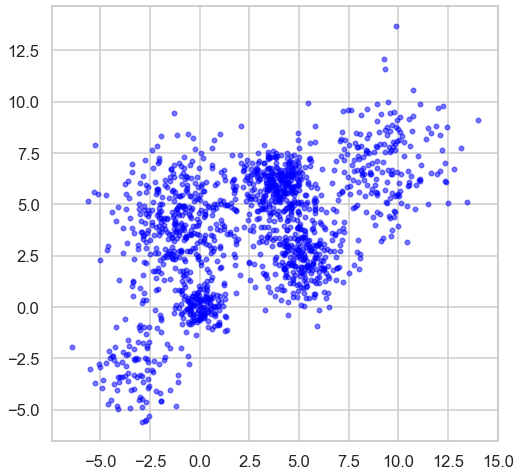

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)

#STANDARDIZATION

display_cluster(Multi_blob_Data)

In [5]:
#STANDARDIZATION
scaler=StandardScaler()
Multi_blob_Data= scaler.fit_transform(Multi_blob_Data)

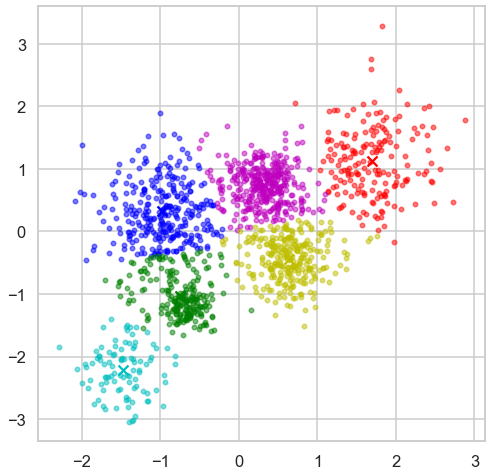

In [6]:
km=KMeans(6, random_state=0).fit(Multi_blob_Data)
display_cluster(Multi_blob_Data, km, 6)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

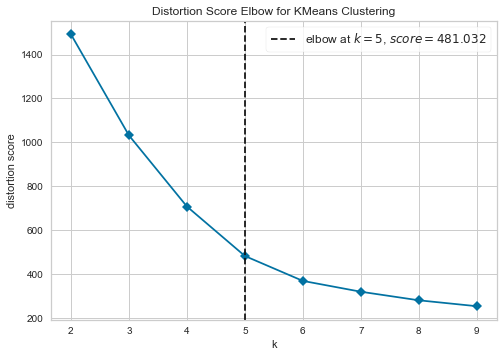

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10), timings= False)
visualizer.fit(Multi_blob_Data)
visualizer.show()

In [138]:
def Kmeans_k(X):
    metrics=[]
    s_scores=[]
    num_clusters=[]
    metric_best=10000000000
    score_best= -10000000000
    diff=1000
    previous_metric=10000
    num_clusters_best_distortion=0
    num_clusters_best_silhouette=0
    for i in range(2,30):
        km=KMeans(i,random_state=0).fit(X)
        metric=km.inertia_
        #print(metric)
        #print(np.sqrt(metric))
        metrics.append(metric)
        num_clusters.append(i)
        score = silhouette_score(X, km.labels_, metric='euclidean')
        s_scores.append(score)
        diff=(previous_metric - metric)/previous_metric
        #print("slope at k="+str(i) +"is" + str(diff))
        
        if(metric<metric_best and (diff> 0.15)):
            num_clusters_best_distortion=i
            metric_best=metric 
            #3print("Best at k="+str(i) +"is" + str(metric_best))
            
        if(score> score_best):
            num_clusters_best_silhouette=i
            score_best=score
        previous_metric=metric
        
        if(len(X[0])<=2):
            plt.figure()
            display_cluster(X,km,i)
    
    #PLOTTING DISTORTION FUNCTION VS K
    plt.figure()   
    plt.plot(num_clusters,metrics, 'bx-')
    plt.ylabel("Cluster Performance Metric")
    plt.xlabel("Values of k")
    plt.title('Distortion Function vs Values of K')
    plt.show()  
    #print("Optimim value of k is", num_clusters_best_distortion)
    
    #PLOTTING SILHOUETTE SCORE VS K
    
    plt.figure()   
    plt.plot(num_clusters,s_scores, 'bx-')
    plt.ylabel("Cluster Silhouette Score")
    plt.xlabel("Values of k")
    plt.title('Silhouette Score vs Values of K')
    plt.show()  
    print("Optimim value of k is", num_clusters_best_silhouette)
    return metric_best, num_clusters_best_distortion, score_best, num_clusters_best_silhouette

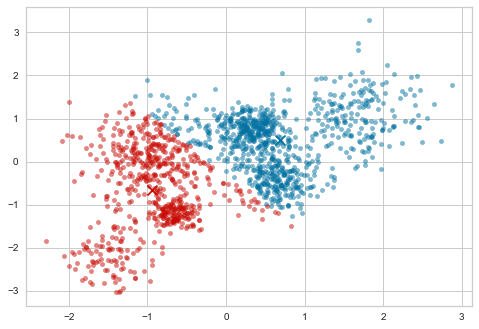

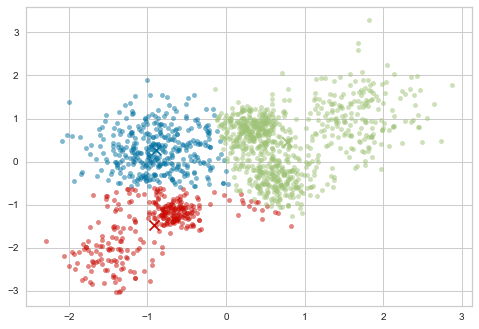

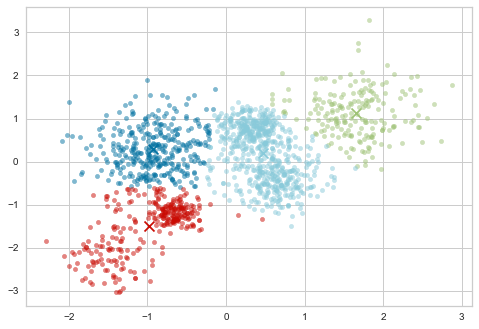

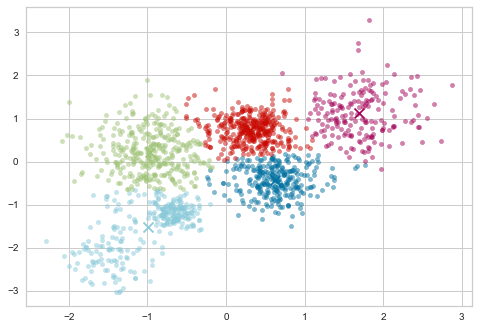

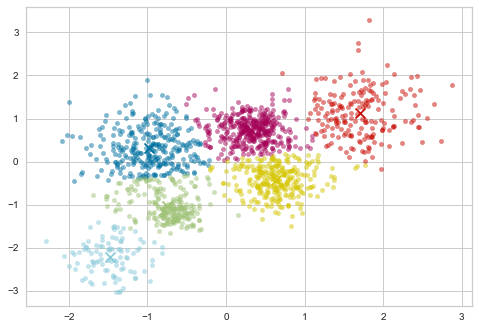

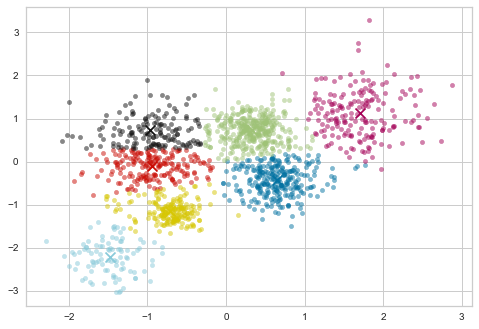

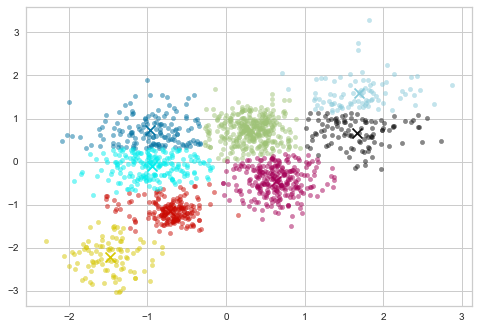

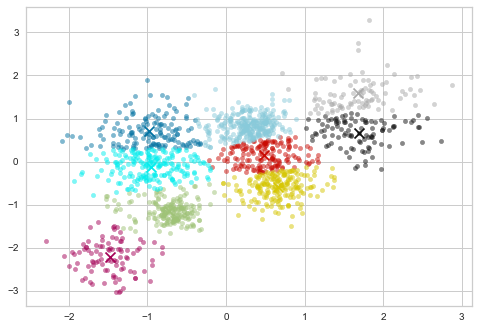

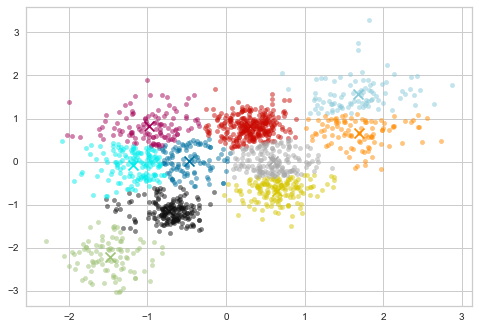

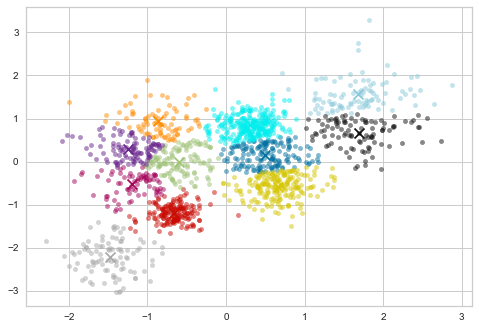

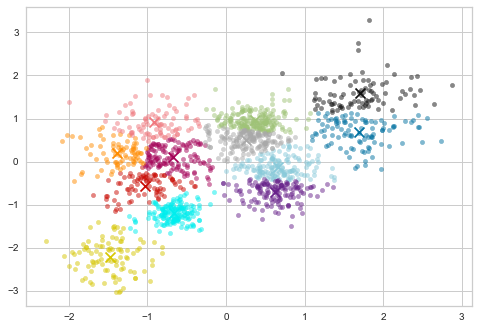

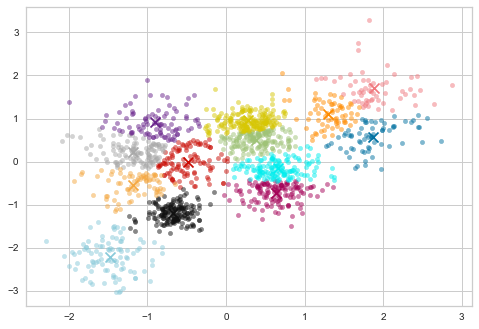

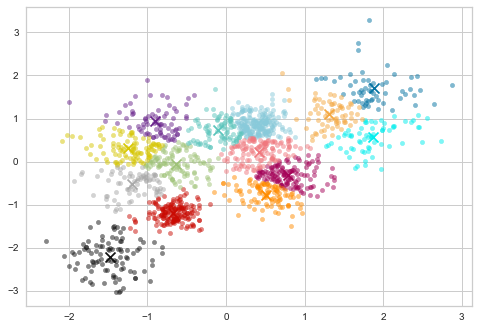

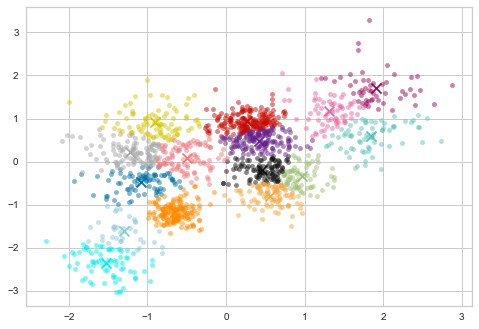

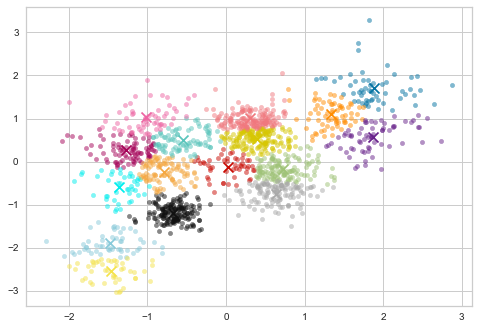

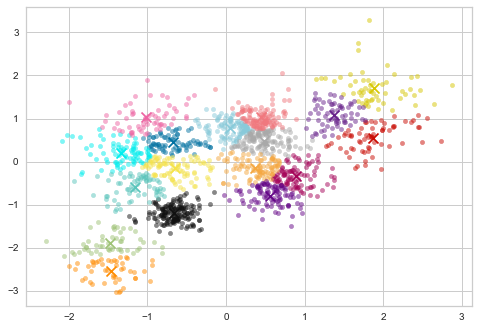

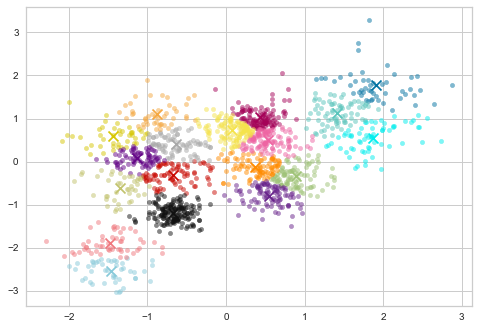

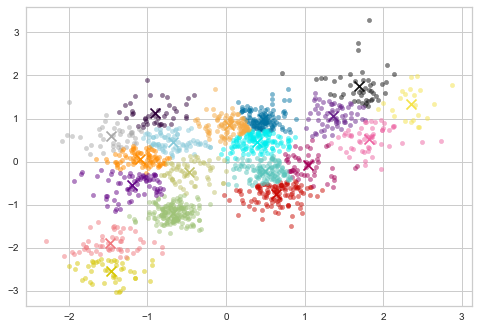

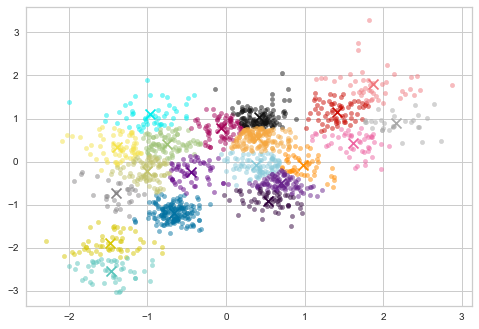

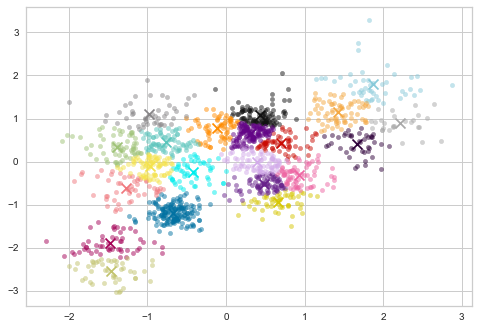

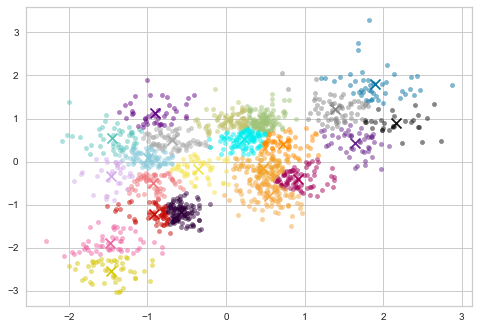

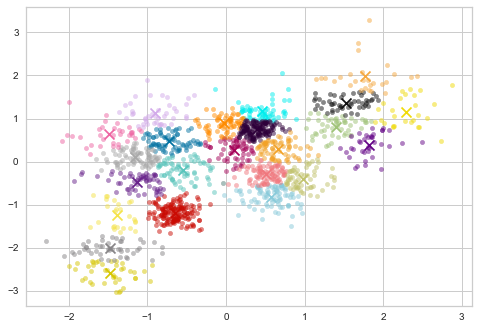

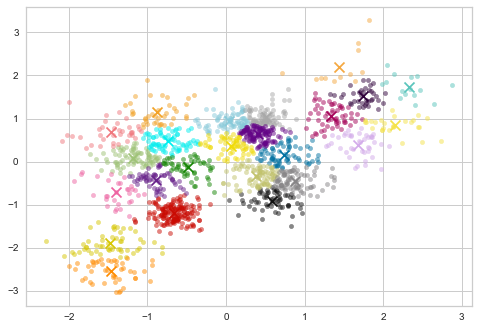

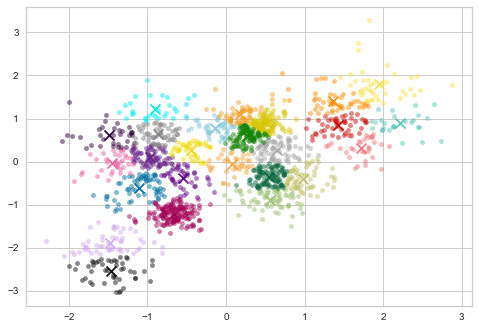

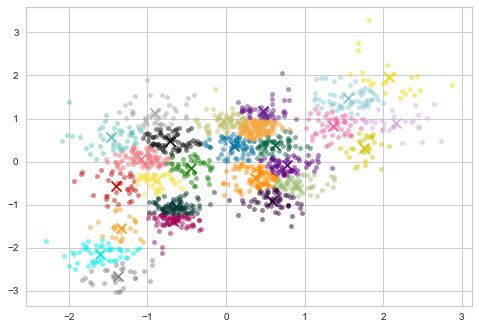

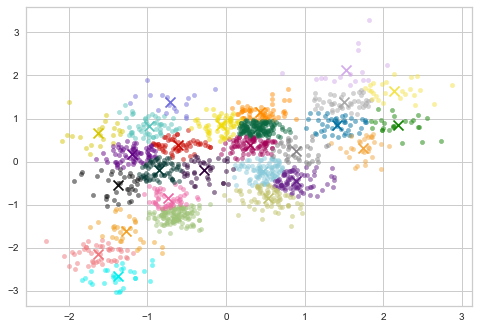

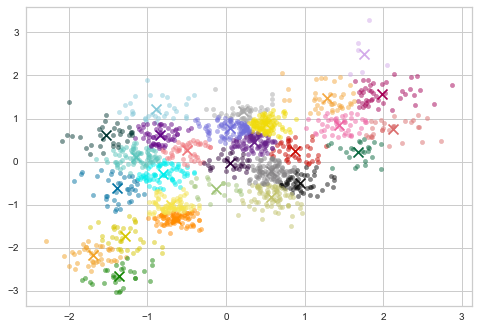

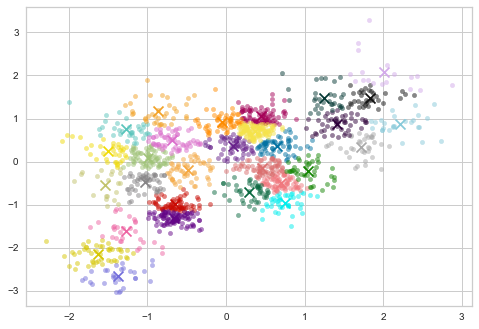

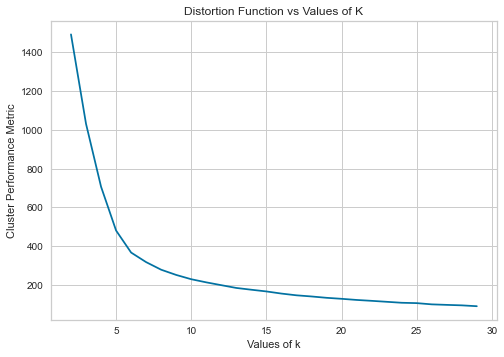

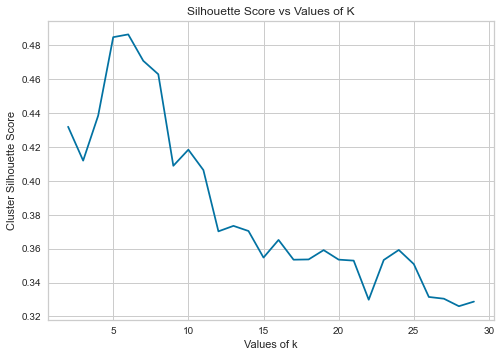

Optimim value of k is 6
0.4862522276594507 6


In [139]:
[best1, k1, best2, k2]=Kmeans_k(Multi_blob_Data)
sil_best_score= best2
sil_best_k=k2
print(best2,k2)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 

  Answer:
    * The best silhouette_score was seen using Cosine and Average which is 0.423606851876823 and num_clusters= 2. The second best silhouette_score that makes better sense is using Euclidean and Average which is 0.3980663073394107 and num_clusters=5
    
    
* Record your observation 

  Answer:
    * Generally, normalizing the dataset before use has helped making the dendrogram y values be consistent and smaller than without normalization.
    * Using 'single' linkage gives inaccurate results when compared to 'average'
    * Cosine and Single combination is the worst in terms of silhouette score since it normally gives a negative value

In [10]:
    color= ['b','r','g','c','m','y','k','#00EEEE','#A9A9A9','#FF8C00','#68228B','#f0787e', '#f5a841', '#5ac5bc', '#ee65a3', '#f5e34b', '#640587', '#c2c36d',
  '#2e003a', '#878587', '#d3abea', '#f2a227', '#f0db08', '#148503', '#0a6940','#043834', '#726edb', '#db6e6e', '#db6ecb', '#6edb91','#144444','#666666', '#282828','#d8d8d8','#0a6930','#0a7940','#0b6940','#0a6740','#Aa6940','#0a1940','#0a6880','#f0777e','#f0f8fe']

In [11]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [27]:
def plot_dendrogram(model):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            #     Values less than n_samples correspond to leaves of the tree which are the original samples.
            if child_idx < n_samples:
                current_count += 1  # leaf node
            #     A node i greater than or equal to n_samples is a non-leaf node and has children children_[i - n_samples]    
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    shc.dendrogram(linkage_matrix)

In [146]:
def Hierarchial_k(X, affinity, linkage):
    print("RESULTS OF CASE: " , affinity, " AND ", linkage)
    scores=[]
    thresholds=[]
    score_best=-1000
    best_clustering= None
    threshold_best_silhouette=0
    num_clusters=0
    score=-1
    #VISUALIZE DATA ON DENDOGRAM
    plt.figure(figsize =(8, 8))
    plt.title('Visualising the data')
    clustering= AgglomerativeClustering(n_clusters= None,affinity=affinity,linkage=linkage, distance_threshold= 0.5)
    plot_dendrogram(clustering.fit(X))
    #Dendrogram = shc.dendrogram((shc.linkage(X, method = linkage, metric= affinity)))
    
    #unique_colors=set(Dendrogram['color_list'])
    #optimal_k= len(unique_colors) -1
    
    if(affinity=='cosine' and linkage=='single'):
        for i in np.arange(0.0001,0.1,0.0003):
            clustering= AgglomerativeClustering(n_clusters= None,affinity=affinity,linkage=linkage, distance_threshold= i).fit(X)
            if(len(np.unique(clustering.fit_predict(X)))>1):
                score = silhouette_score(X, clustering.labels_, metric='euclidean')
                scores.append(score)
                thresholds.append(i)
        
                if(score> score_best):
                    threshold_best_silhouette=i
                    score_best=score
                    best_clustering=clustering
            else:
                break
    
    else:
        for i in np.arange(0.1,5,0.1):
            clustering= AgglomerativeClustering(n_clusters= None,affinity=affinity,linkage=linkage, distance_threshold= i).fit(X)
            if(len(np.unique(clustering.fit_predict(X)))>1):
                score = silhouette_score(X, clustering.labels_, metric='euclidean')
                scores.append(score)
                thresholds.append(i)
        
                if(score> score_best):
                    threshold_best_silhouette=i
                    score_best=score
                    best_clustering=clustering
            else:
                break
        
        
    if(best_clustering!= None):
        labels=best_clustering.labels_
        #unique_labels=set(best_clustering.labels_)
        num_clusters= best_clustering.n_clusters_
        if(len(X[0])<=2):
            plt.figure()
            plt.scatter(X[:,0], X[:,1], c=labels, cmap=plt.cm.viridis)
            plt.show()
    
    #print(scores)
    #print(thresholds)
    print("Optimum distance threshold =" , threshold_best_silhouette)
    print("Number of Clusters =" , num_clusters)
    #PLOTTING
    #y_clustering= best_clustering.fit_predict(X)
    
    
    
    #for i in range(int(threshold_best_silhouette)):
     #   plt.scatter(X[y_clustering==i,0], X[y_clustering==i,1] , s=100, c= color[i])
    

    plt.figure()   
    plt.plot(thresholds,scores, 'bx-')
    plt.ylabel("Silhouette Score")
    plt.xlabel("Values of Distance Thresholds")
    plt.title('Silhouette Score vs Distance Thresholds')
    plt.show()  

    #print(f"Number of clusters = {1+np.amax(clustering.labels_)}")

    return score, num_clusters, threshold_best_silhouette     
    

RESULTS OF CASE:  euclidean  AND  average


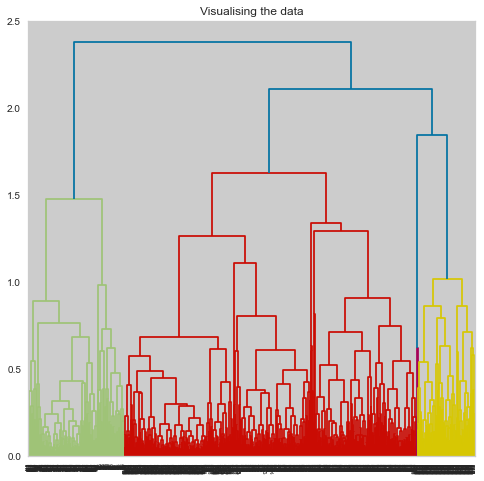

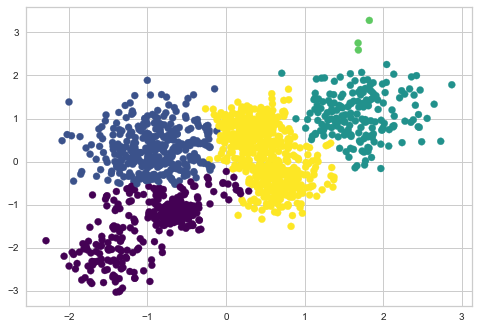

Optimum distance threshold = 1.5000000000000002
Number of Clusters = 5


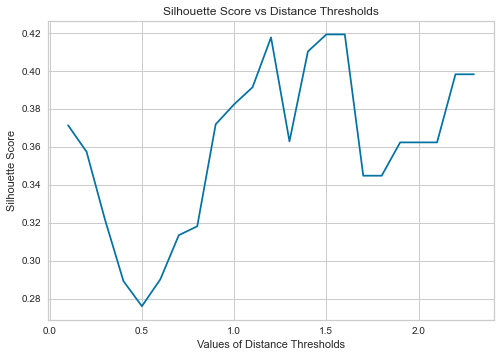

RESULTS OF CASE:  euclidean  AND  single


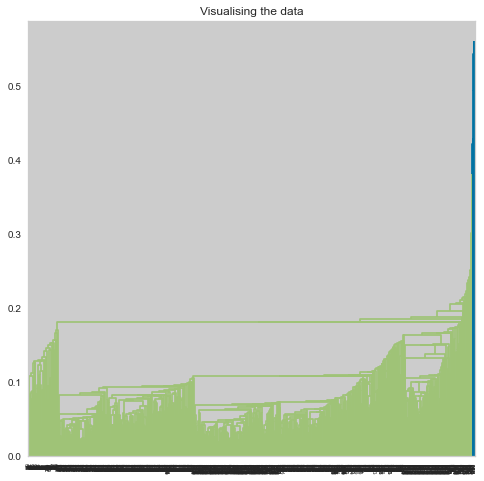

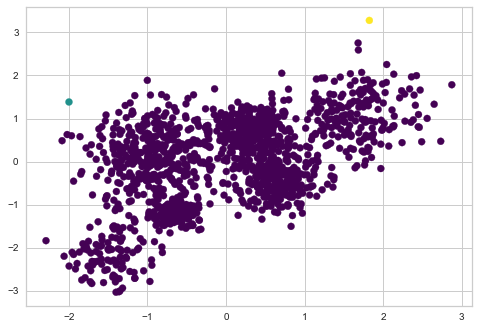

Optimum distance threshold = 0.5
Number of Clusters = 3


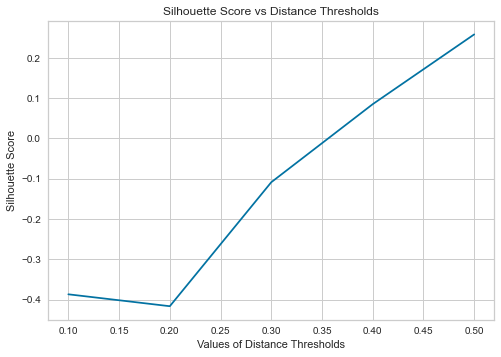

RESULTS OF CASE:  manhattan  AND  average


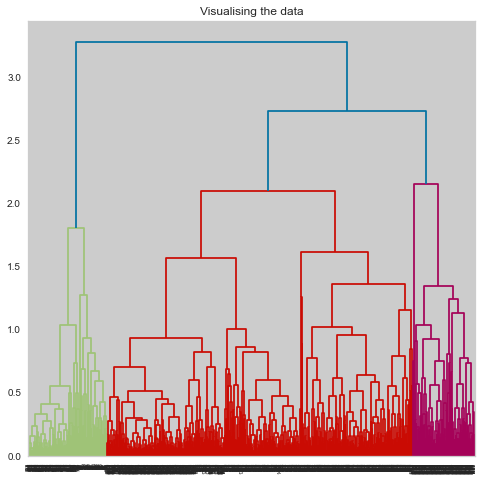

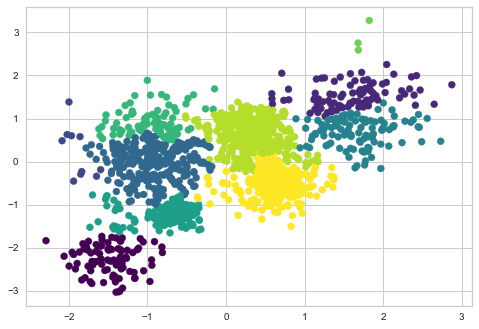

Optimum distance threshold = 1.3000000000000003
Number of Clusters = 10


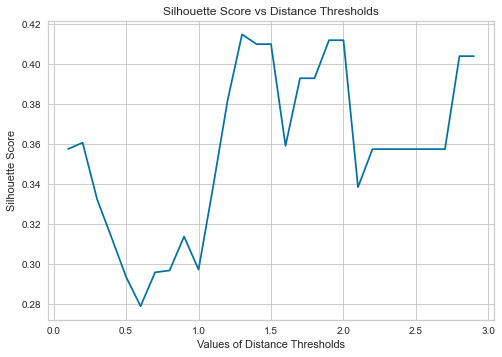

RESULTS OF CASE:  manhattan  AND  single


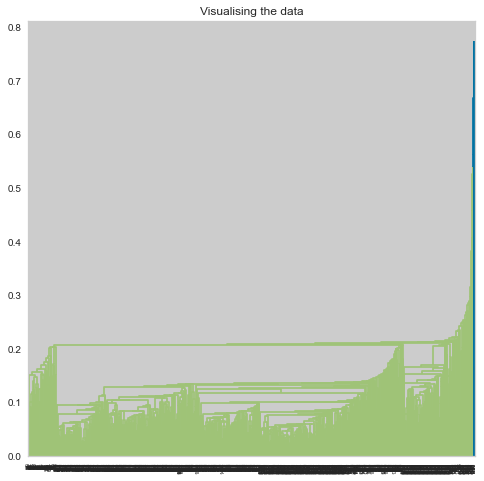

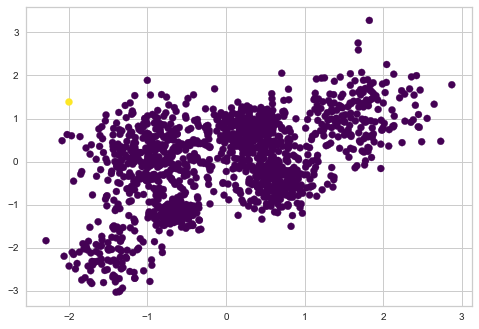

Optimum distance threshold = 0.7000000000000001
Number of Clusters = 2


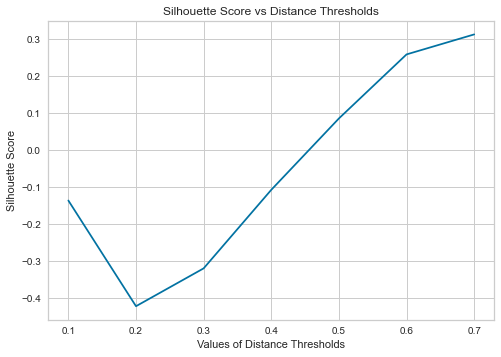

RESULTS OF CASE:  cosine  AND  average


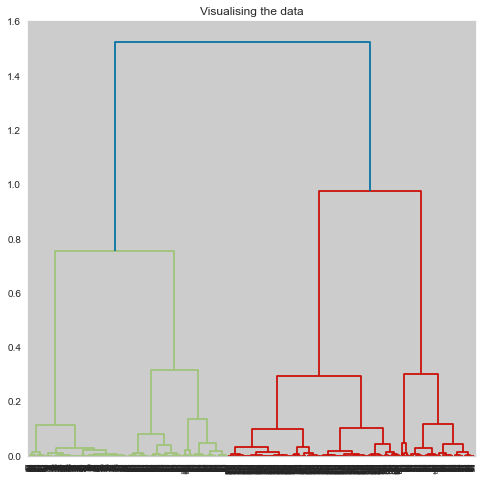

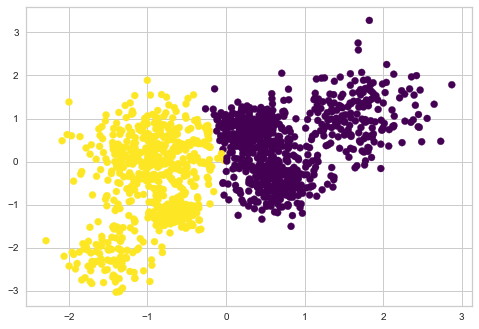

Optimum distance threshold = 1.0
Number of Clusters = 2


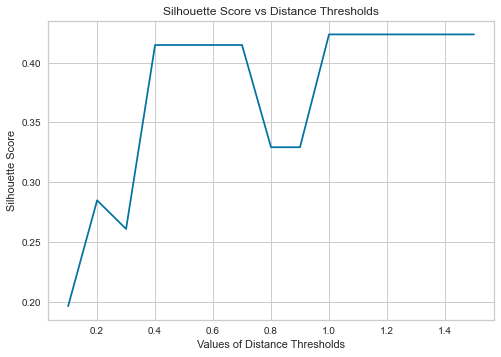

RESULTS OF CASE:  cosine  AND  single


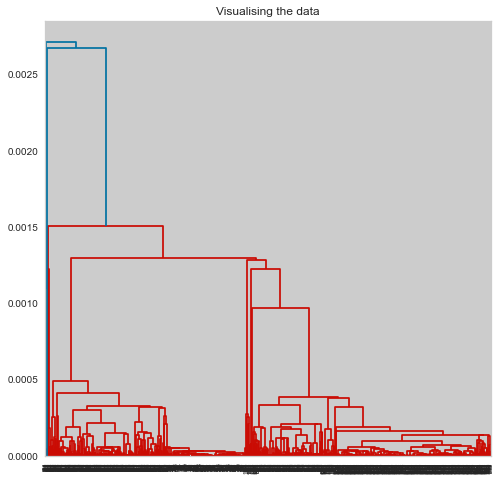

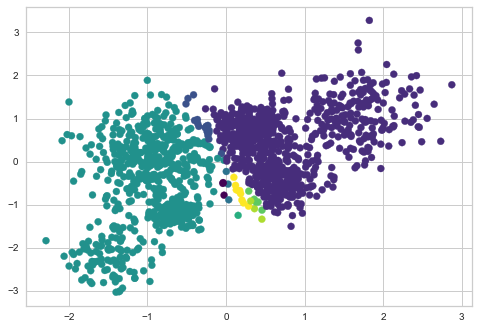

Optimum distance threshold = 0.001
Number of Clusters = 9


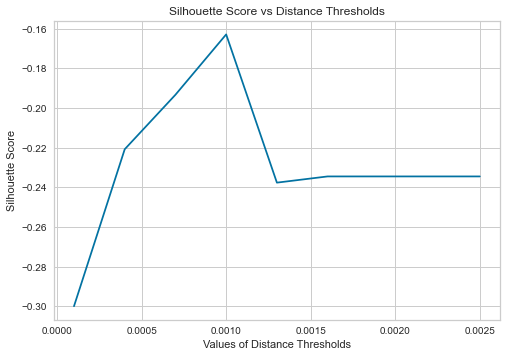

In [66]:
[s1,k1,d1]=Hierarchial_k(Multi_blob_Data, "euclidean", "average")
[s2,k2,d2]=Hierarchial_k(Multi_blob_Data, "euclidean", "single")
[s3,k3,d3]=Hierarchial_k(Multi_blob_Data, "manhattan", "average")
[s4,k4,d4]=Hierarchial_k(Multi_blob_Data, "manhattan", "single")
[s5,k5,d5]=Hierarchial_k(Multi_blob_Data, "cosine", "average")
[s6,k6,d6]=Hierarchial_k(Multi_blob_Data, "cosine", "single")

In [67]:
print(s1,s2,s3,s4,s5,s6)
print(k1,k2,k3,k4,k5,k6)

0.3980663073394107 0.2575960381067269 0.4041023766693095 0.3116005968350845 0.423606851876823 -0.23446679603336645
5 3 10 2 2 9


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
 * Answer:
    * The best parameters are silhouette_score= 0.5047268616466032 , eps=0.6 , min_samples=5 and num_clusters=2
* Record your observations and comments 
 * Answer:
    * For a normalized dataset, values of epsilon above 1.0 are quite large, resulting in the formation of only 1 cluster. Although epsilon values in the for loop range between 0.1 and 3.1, we will most probably see the code stopping at max. value of 0.9.
    * Many combinations of eps and min_samples can give the same silhouette score. I chose to always choose the combination with smallest values of eps and min_samples to avoid large complexities.
  

In [68]:
def DBScan_k(X):
    best_score=-10000
    best_eps=0
    best_samples=0
    k=0
   # Defining the list of hyperparameters to try
    eps_list=np.arange(start=0.1, stop=3.1, step=0.1)
    min_sample_list=np.arange(start=5, stop=26, step=5)
 
    # Creating empty data frame to store the silhouette scores for each trials
    silhouette_scores_data=pd.DataFrame()
 
    for eps_trial in eps_list:
        for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
            db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
            if(len(np.unique(db.fit_predict(X)))>1):
                sil_score=silhouette_score(X, db.fit_predict(X))
                trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
                silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
                
                if(sil_score> best_score):
                    best_score=sil_score
                    best_eps=eps_trial
                    best_samples=min_sample_trial
            #else:
             #   continue
           
 
    # Finding out the best hyperparameters with highest Score
    #score_best=silhouette_scores_data.sort_values(by='score', ascending=False).head(1)
    

    #for i in np.arange(0.1,3.1,0.1):
     #   eps.append(i)
       # clustering= DBSCAN(eps=i,min_samples=25)
        #if(len(np.unique(db.fit_predict(X)))>1):
         #   sil_score=silhouette_score(X, db.fit_predict(X))
          #  s_scores1.append(sil_score)
    
        
     #PLOTTING SILHOUETTE SCORE VS K
    
    #plt.figure()   
    #plt.plot(eps,s_scores1)
    #plt.ylabel("Cluster Silhouette Score")
    #plt.xlabel("EPS")
    #plt.title('Silhouette Score vs EPS')
    #plt.show()  
    
    
    #for j in range(5,26,1):
     #   min_samples.append(j)
      #  clustering= DBSCAN(eps=3,min_samples=j)
       # if(len(np.unique(db.fit_predict(X)))>1):
        #    sil_score=silhouette_score(X, db.fit_predict(X))
         #   s_scores2.append(sil_score)
    
    
        
     #PLOTTING SILHOUETTE SCORE VS K
    
    plt.figure(figsize=(15,15))   
    x= silhouette_scores_data['parameters']
    y=silhouette_scores_data['score']
    plt.plot(x , y, 'bx-')
    plt.xticks(rotation=90)
    plt.ylabel("Silhouette Score")
    plt.xlabel("Parameters")
    plt.title('Silhouette Score vs Parameters')
    plt.show() 
    
    #SHOWING CLUSTERS
    
    db= DBSCAN(eps=best_eps, min_samples=best_samples).fit(X)
    labels=db.labels_
    k=len(set(labels))
    if(len(X[0])<=2):
        plt.figure()
        plt.scatter(X[:,0], X[:,1], c= labels, cmap=plt.cm.viridis)
        plt.show()
    

    return silhouette_scores_data , best_score, best_eps, best_samples ,k
    

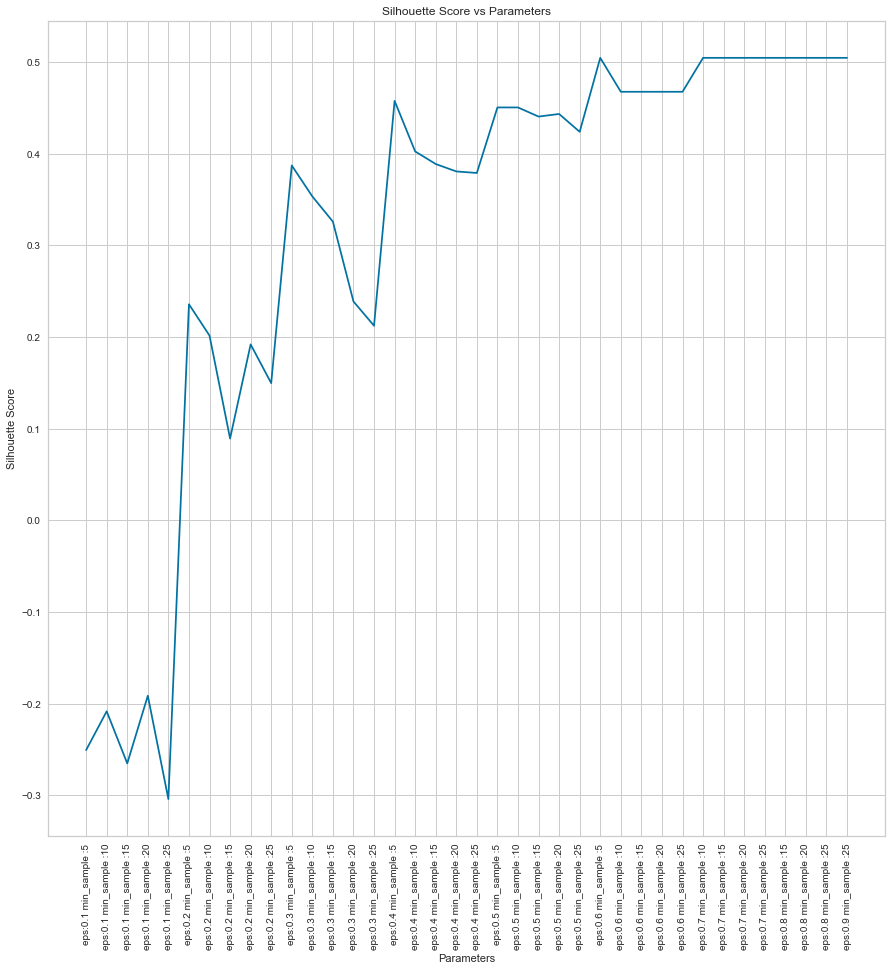

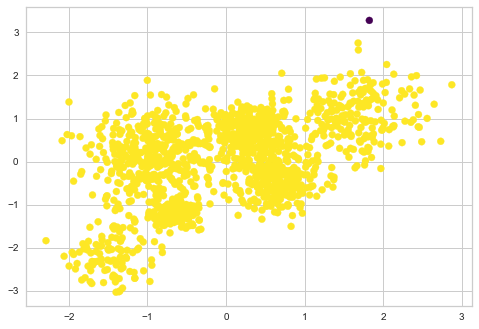

In [69]:
[data, s_score, eps, min_samples, k]=DBScan_k(Multi_blob_Data)

In [70]:
print(s_score,eps,min_samples,k)

0.5047268616466032 0.6 5 2


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [113]:
from matplotlib.colors import LogNorm
def Gaussian(data, cov_type):
    gmms=[]
    best_k=0
    components=np.arange(2,15)
    for i in range(2,15):
        gmm = GaussianMixture(n_components=i, covariance_type= cov_type).fit(data)
        gmms.append(gmm)
        results=gmm.weights_
        #print("PROBABILITY FIT AT N_COMPONENTS= "+ str(i))
        #print(results)
        #print(gmm.means_)
        #print(gmm.covariances_)
        print(gmm.predict_proba(data))
    bics=[gmm.bic(data) for gmm in gmms]
    aics=[gmm.aic(data) for gmm in gmms]
    min_bics=np.argmin(bics)
    min_aics=np.argmin(aics)
    best_k= min(min_bics,min_aics)+2
    print("Best number of components as shown from the graphs of AICS and BICS is: " + str(best_k))
    
    plt.plot(components, bics, label='BIC')
    plt.plot(components, aics, label='AIC')
    plt.legend();
    
    #PLOTTING CONTOUR PLOT
    if(len(data[0])<=2):
        plt.figure(figsize=(10,10))
        clf = GaussianMixture(n_components= best_k, covariance_type=cov_type)
        clf.fit(data)
        x = np.linspace(min(data[:,0]), max(data[:,0]))
        y = np.linspace(min(data[:,1]), max(data[:,1]))
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        #print(X.shape)
        #print(XX.shape)
        Z = -clf.score_samples(XX)
        Z = Z.reshape(X.shape)
        #print(Z)
    

        CS = plt.contourf(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10), cmap='Reds')
        CB = plt.colorbar(CS, shrink=0.8, extend="both")
        plt.scatter(data[:, 0], data[:, 1], 0.8 ,marker = "x")

        plt.title("Negative log-likelihood predicted by a GMM at N_components = " + str(best_k))
        plt.axis("tight")
        plt.show()
    
    
        
    #print('BEST RESULTS WITH N_COMPONENTS = '+str(best_k))
    #cluster=best_model.predict(X)
    #plt.figure()
    #plt.scatter(X[:,0], X[:,1], c= cluster)
    #plt.show()
    
    

[[5.72397877e-03 9.94276021e-01]
 [2.27181541e-02 9.77281846e-01]
 [4.02992618e-03 9.95970074e-01]
 ...
 [9.99999984e-01 1.58091144e-08]
 [9.99193761e-01 8.06239311e-04]
 [9.99999961e-01 3.86995810e-08]]
[[2.33738473e-03 9.97408655e-01 2.53960388e-04]
 [1.51853530e-02 9.70089985e-01 1.47246616e-02]
 [1.18060483e-03 9.98688770e-01 1.30624830e-04]
 ...
 [1.00000000e+00 2.06289991e-10 4.58695780e-16]
 [9.99997373e-01 5.48017546e-07 2.07848313e-06]
 [9.99998034e-01 1.96564815e-06 2.61597437e-11]]
[[5.87948300e-16 1.17497299e-08 9.99999988e-01 9.69780757e-21]
 [1.87326257e-14 4.14326213e-05 9.99958567e-01 5.28031797e-17]
 [6.69431548e-18 1.42409976e-08 9.99999986e-01 4.31390546e-25]
 ...
 [9.99860304e-01 1.39317429e-04 3.78192227e-07 2.88136978e-17]
 [1.31186186e-01 8.56973128e-01 3.04771045e-03 8.79297499e-03]
 [7.70430934e-01 2.29559847e-01 5.92493917e-06 3.29431138e-06]]
[[2.95904718e-04 1.31177355e-15 9.99704095e-01 7.68426684e-33
  1.29642843e-17]
 [1.61224153e-02 2.23609926e-13 9.8387

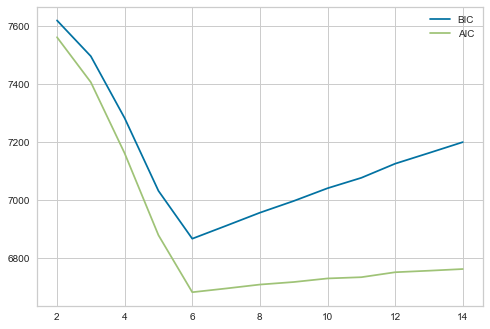

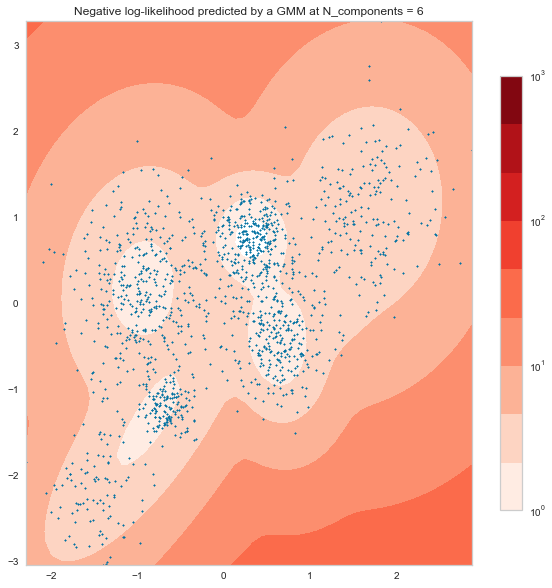

In [114]:
Gaussian(Multi_blob_Data, 'full')

[[9.91591774e-01 8.40822558e-03]
 [9.90397011e-01 9.60298932e-03]
 [9.96876463e-01 3.12353660e-03]
 ...
 [5.41372389e-04 9.99458628e-01]
 [4.70104480e-02 9.52989552e-01]
 [1.82377619e-03 9.98176224e-01]]
[[9.99986587e-01 1.34126721e-05 5.78622639e-16]
 [9.99961364e-01 3.86355170e-05 4.70692592e-15]
 [9.99998683e-01 1.31661097e-06 7.13577950e-18]
 ...
 [1.00136248e-13 7.71222702e-04 9.99228777e-01]
 [1.40257418e-05 9.66389191e-01 3.35967828e-02]
 [1.37210625e-09 7.60878573e-02 9.23912141e-01]]
[[9.97336852e-01 1.33241797e-08 1.53084662e-05 2.64782591e-03]
 [9.81290585e-01 2.01848734e-06 2.81576937e-03 1.58916274e-02]
 [9.98750206e-01 5.32978360e-09 1.72944498e-05 1.23249389e-03]
 ...
 [4.88716127e-13 9.67233161e-01 3.27635775e-02 3.26121442e-06]
 [1.43784821e-08 3.04665530e-01 6.95096724e-01 2.37730909e-04]
 [1.46091977e-06 9.25066500e-01 4.34924064e-02 3.14396326e-02]]
[[3.23736953e-07 1.75658121e-05 2.00969194e-08 9.99982090e-01
  1.21825974e-18]
 [1.63106658e-06 2.58483053e-03 2.7337

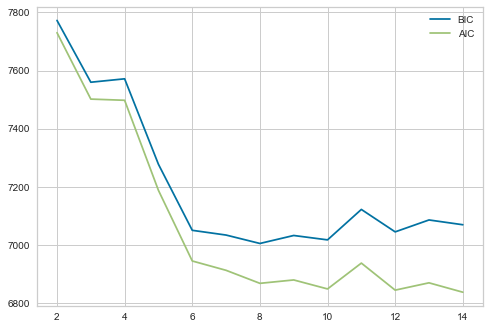

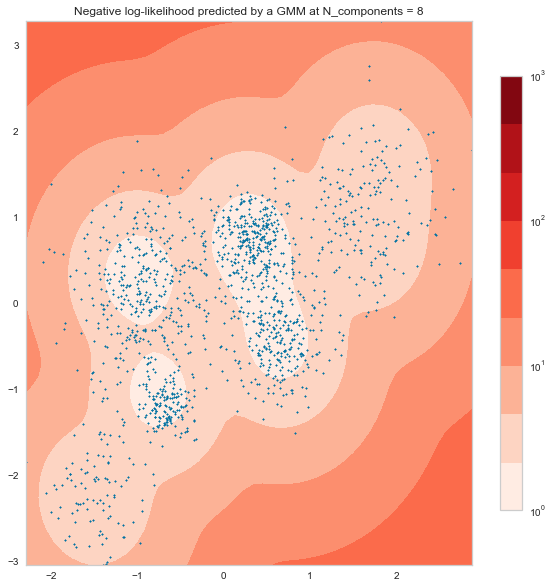

In [115]:
Gaussian(Multi_blob_Data, 'tied')

[[6.72244198e-04 9.99327756e-01]
 [4.37438213e-03 9.95625618e-01]
 [3.25120487e-04 9.99674880e-01]
 ...
 [9.99833835e-01 1.66165133e-04]
 [9.95509589e-01 4.49041077e-03]
 [9.96663846e-01 3.33615421e-03]]
[[3.02671045e-04 9.99696903e-01 4.25778827e-07]
 [2.61319039e-03 9.96969779e-01 4.17030707e-04]
 [1.53970293e-04 9.99845806e-01 2.24058254e-07]
 ...
 [1.00000000e+00 4.11196275e-18 2.03630384e-16]
 [9.99999008e-01 2.02964974e-10 9.92181039e-07]
 [9.99999969e-01 1.08486415e-09 2.97783395e-08]]
[[9.99985384e-01 9.48510569e-07 1.36679281e-05 3.33962147e-18]
 [9.97719054e-01 3.40684609e-05 2.24687728e-03 1.12570116e-12]
 [9.99991518e-01 3.19955594e-07 8.16186755e-06 4.10854049e-21]
 ...
 [2.82428356e-18 1.00000000e+00 3.45778641e-11 1.30474431e-40]
 [1.20480624e-10 9.99921560e-01 7.84403520e-05 6.84424245e-18]
 [6.85388142e-10 9.99994047e-01 5.95233320e-06 9.27832627e-11]]
[[4.57160186e-16 4.70369998e-06 1.51167940e-14 2.60987313e-36
  9.99995296e-01]
 [7.09282160e-13 1.26171926e-03 3.5643

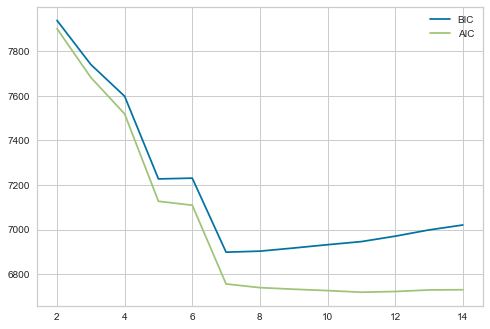

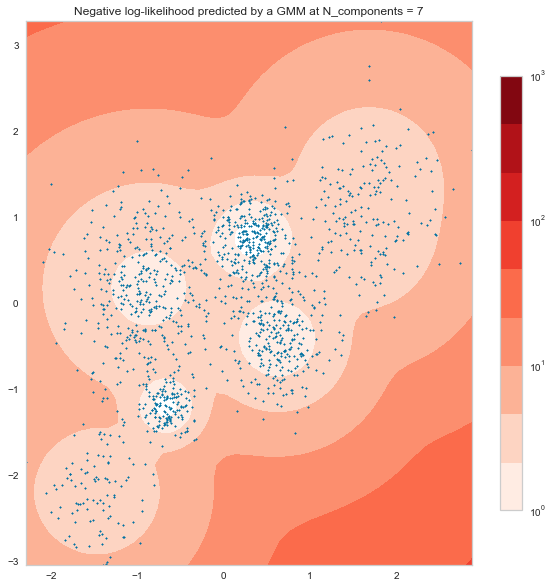

In [116]:
Gaussian(Multi_blob_Data, 'spherical')

[[9.99727567e-01 2.72432961e-04]
 [9.97372355e-01 2.62764481e-03]
 [9.99837442e-01 1.62558229e-04]
 ...
 [1.95697087e-10 1.00000000e+00]
 [4.72826910e-05 9.99952717e-01]
 [6.01858560e-09 9.99999994e-01]]
[[2.11260494e-04 9.99724866e-01 6.38733324e-05]
 [2.20308777e-03 9.91706237e-01 6.09067507e-03]
 [1.11219385e-04 9.99853546e-01 3.52348648e-05]
 ...
 [1.00000000e+00 9.11043672e-16 4.21200430e-18]
 [9.99999786e-01 1.53689365e-08 1.98717861e-07]
 [1.00000000e+00 2.64487312e-10 7.45088557e-12]]
[[3.57240071e-16 1.00000000e+00 7.16371934e-30 4.98959713e-18]
 [1.08084953e-12 1.00000000e+00 1.01508853e-20 1.84592186e-15]
 [4.11612564e-19 1.00000000e+00 4.83612409e-33 8.79716502e-20]
 ...
 [3.50239494e-23 2.34419666e-09 1.58149112e-20 9.99999998e-01]
 [3.51655796e-08 2.59918722e-03 5.16049339e-03 9.92240284e-01]
 [9.31974046e-07 5.60343396e-08 2.84458693e-05 9.99970566e-01]]
[[5.61213875e-004 8.98178488e-021 1.71481140e-009 9.99438784e-001
  5.00967601e-010]
 [1.03053417e-001 2.57411070e-017

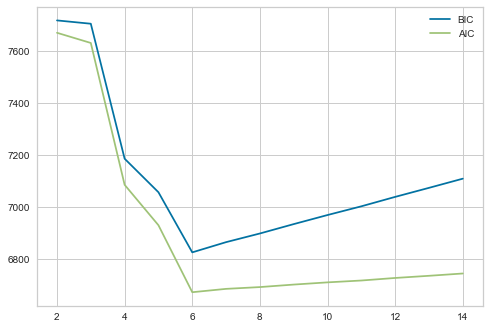

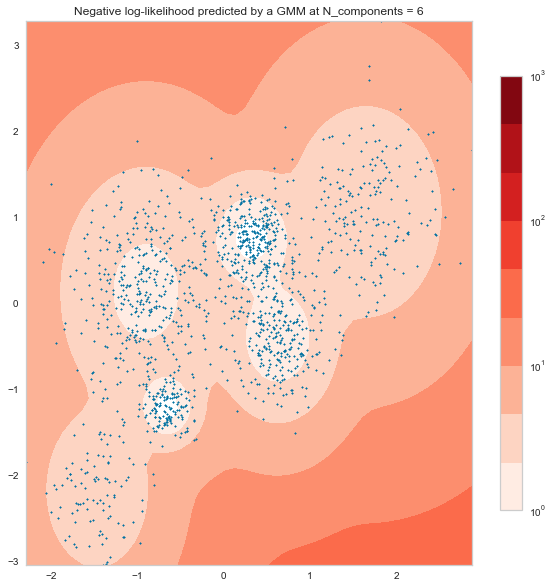

In [117]:
Gaussian(Multi_blob_Data, 'diag')

In [153]:
##Summary on Multi_blob_data:
#1- Kmeans: sil_score=0.4862522276594507 k=6
#2- Hierarchial: silhouette_score=0.423606851876823 and num_clusters= 2. The second best silhouette_score is 0.3980663073394107 and num_clusters=5
#3- DBSCAN: silhouette_score= 0.5047268616466032 , eps=0.6 , min_samples=5 and num_clusters=2
#4- Gaussian: From BICs and AICS graphs: n_components=6 with cov_type=Full

#The best 2 techniques for this dataset are Kmeans and Gaussian giving k=6 and Kmeans givinga  quite acceptable sil_score in comparison to all other sil_scores obtained from other algorithms.

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [77]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [78]:
len(iris_data.data[0])

4

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

  Answer
  * Before Normalization:
      * Kmeans: sil_score= 0.6810461692117462 num_cluster= 2
      * Hierarchial: sil_score is 0.6867350732769777 at nearly all combinations of affinities and linkages. Num_of_Clusters= 2
      * DBScan: Best parameters are sil_score=0.6867350732769777 eps= 0.9 min_samples= 5 and k=2
      * Gaussian: Each Covariance type gave a totally different estimate of the best number of components in reference to the AICs and BICS graphs.
      
          * Full Covariance gives 2 components
          * Tied gives 4 components
          * Spherical gives 8 components
          * Diag gives 6 components
          
  * After Normalization:
  
      * Kmeans: sil_score= 0.5817500491982808 , num_clusters=2
      * Hierarchial: sil_score is 0.5817500491982808 at most of the combinations and num_clusters =2. The anticipated value of num_clusters =3 is only seen with the combination of Euclidean and Average giving a sil_score of 0.4802669329728697. Still, the Cosine and Single Combination gives the worst results
      * DBScan: sil_score= 0.5817500491982808, eps= 1.4000000000000001, min_samples= 5, Num_components= 2
      * Gaussian: Each Covariance type gave a totally different estimate of the best number of components in reference to the AICs and BICS graphs.
      
          * Full Covariance gives 2 components
          * Tied gives 6 components
          * Spherical gives 12 components
          * Diag gives 4 components
          
   * Conclusion:
       * The silhouette scores are approximately the same when using any of the 4 algorithms on the iris_dataset. However, the silhouette scores are better with no normalization as compared to the normalized results. The algorithms give the number of clusters =2
          
  

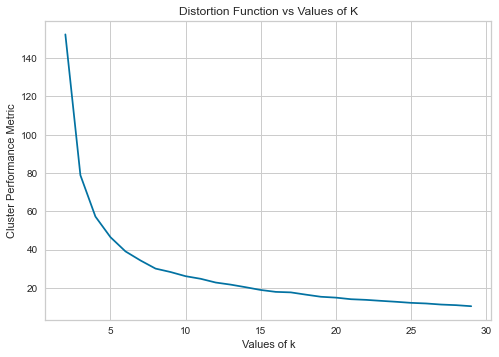

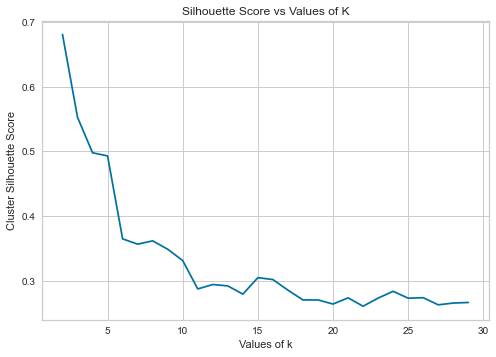

Optimim value of k is 2
0.6810461692117462 2


In [140]:
[best1, k1, best2, k2]=Kmeans_k(iris_data.data)
print(best2,k2)

RESULTS OF CASE:  euclidean  AND  average
Optimum distance threshold = 2.0
Number of Clusters = 2


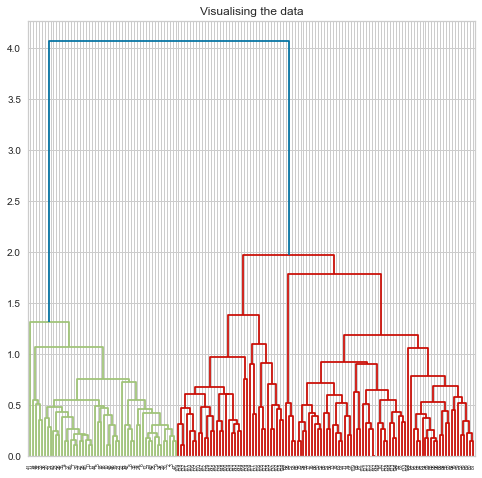

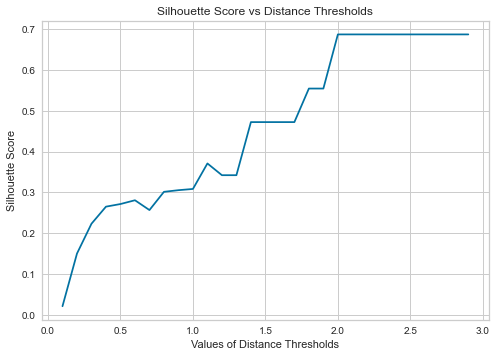

RESULTS OF CASE:  euclidean  AND  single
Optimum distance threshold = 0.9
Number of Clusters = 2


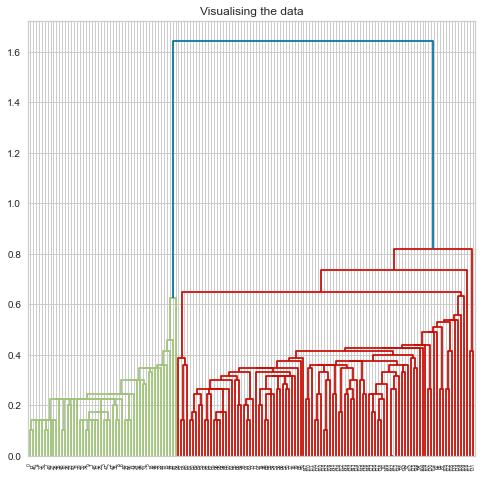

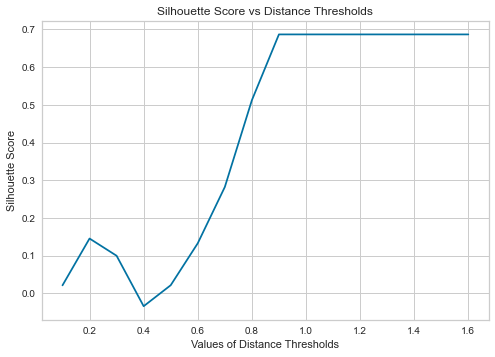

RESULTS OF CASE:  manhattan  AND  average
Optimum distance threshold = 2.4000000000000004
Number of Clusters = 4


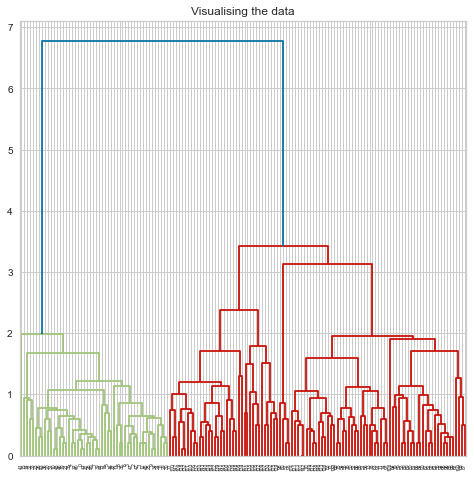

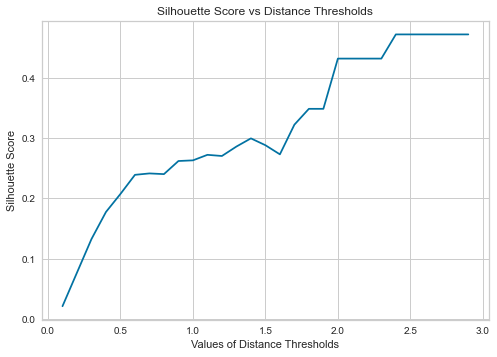

RESULTS OF CASE:  manhattan  AND  single
Optimum distance threshold = 1.2000000000000002
Number of Clusters = 2


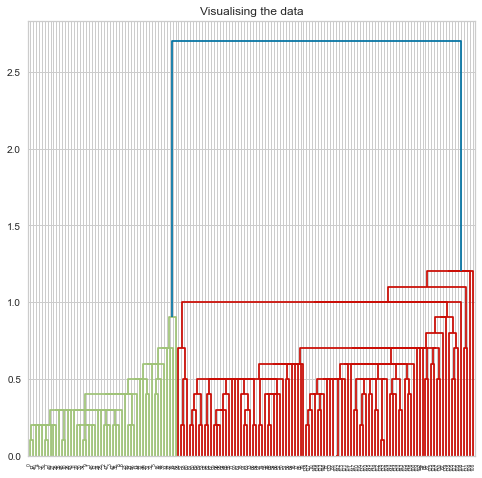

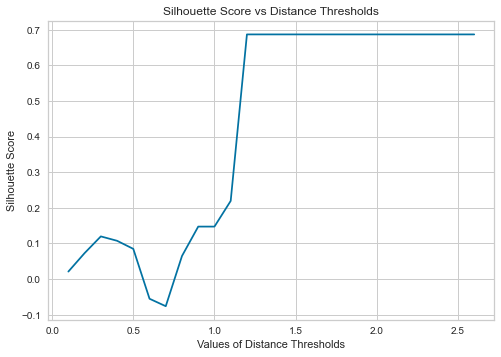

RESULTS OF CASE:  cosine  AND  average
Optimum distance threshold = 0
Number of Clusters = 0


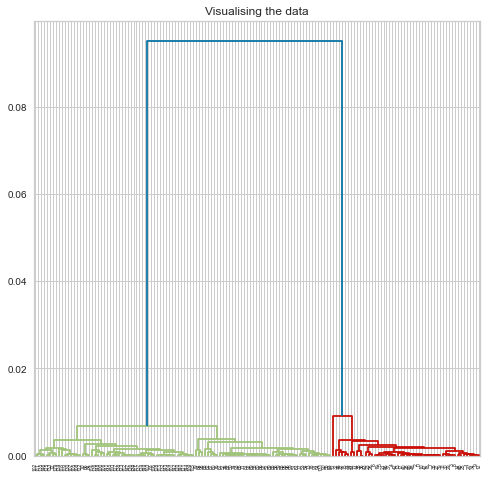

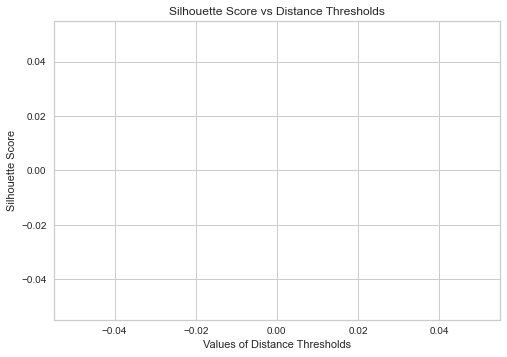

RESULTS OF CASE:  cosine  AND  single
Optimum distance threshold = 0.0027999999999999995
Number of Clusters = 2


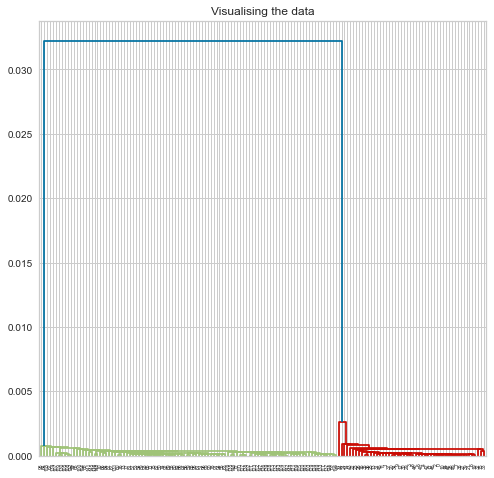

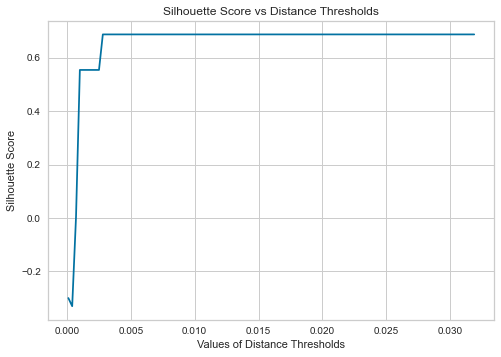

In [80]:
[s1,k1,d1]=Hierarchial_k(iris_data.data, "euclidean", "average")
[s2,k2,d2]=Hierarchial_k(iris_data.data, "euclidean", "single")
[s3,k3,d3]=Hierarchial_k(iris_data.data, "manhattan", "average")
[s4,k4,d4]=Hierarchial_k(iris_data.data, "manhattan", "single")
[s5,k5,d5]=Hierarchial_k(iris_data.data, "cosine", "average")
[s6,k6,d6]=Hierarchial_k(iris_data.data, "cosine", "single")

In [81]:
print(s1,s2,s3,s4,s5,s6)
print(k1,k2,k3,k4,k5,k6)

0.6867350732769777 0.6867350732769777 0.47195185980984994 0.6867350732769777 -1 0.6867350732769777
2 2 4 2 0 2


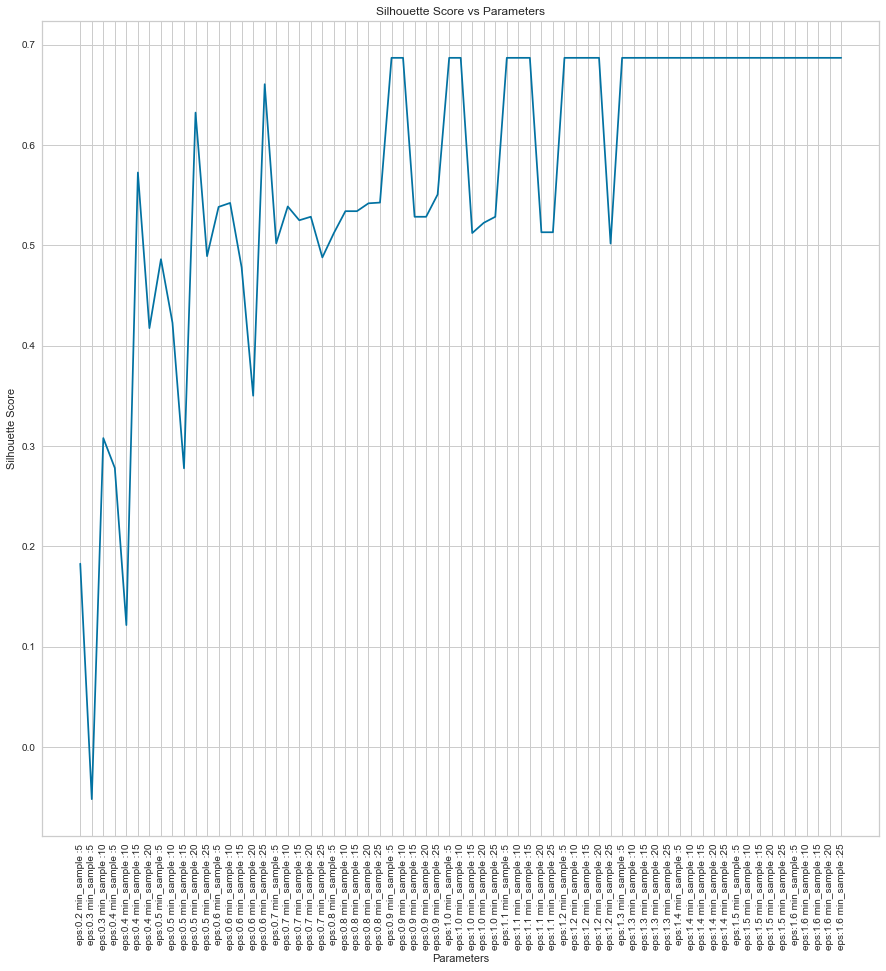

0.6867350732769777 0.9 5 2


In [82]:
[data, s_score, eps, min_samples, k]=DBScan_k(iris_data.data)
print(s_score,eps,min_samples,k)

[[2.18043998e-011 1.00000000e+000]
 [7.81327712e-008 9.99999922e-001]
 [4.90263308e-009 9.99999995e-001]
 [1.32940646e-007 9.99999867e-001]
 [6.91148058e-012 1.00000000e+000]
 [8.33991270e-013 1.00000000e+000]
 [3.05493660e-009 9.99999997e-001]
 [3.98136674e-010 1.00000000e+000]
 [1.51294445e-006 9.99998487e-001]
 [9.02883211e-008 9.99999910e-001]
 [8.46462965e-013 1.00000000e+000]
 [3.14362156e-009 9.99999997e-001]
 [1.53335096e-007 9.99999847e-001]
 [3.85678386e-007 9.99999614e-001]
 [1.07199360e-016 1.00000000e+000]
 [7.73859193e-019 1.00000000e+000]
 [1.40104958e-014 1.00000000e+000]
 [2.96701679e-011 1.00000000e+000]
 [1.46872137e-012 1.00000000e+000]
 [6.43122700e-013 1.00000000e+000]
 [5.07234600e-009 9.99999995e-001]
 [1.03990183e-011 1.00000000e+000]
 [8.13168454e-011 1.00000000e+000]
 [3.78233479e-007 9.99999622e-001]
 [6.60663370e-007 9.99999339e-001]
 [7.67285015e-007 9.99999233e-001]
 [5.21504048e-009 9.99999995e-001]
 [4.52614809e-011 1.00000000e+000]
 [8.99931645e-011 1.

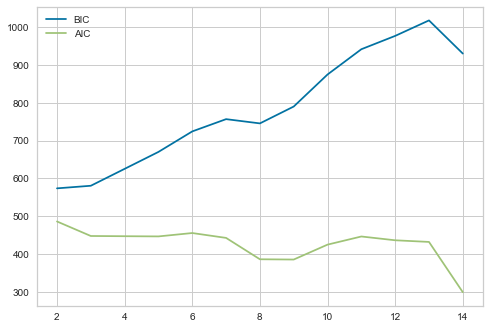

In [118]:
Gaussian(iris_data.data, 'full')

[[1.00000000e+00 6.35349184e-11]
 [9.99999954e-01 4.59833150e-08]
 [9.99999997e-01 2.71807442e-09]
 [9.99999889e-01 1.10822489e-07]
 [1.00000000e+00 2.67559507e-11]
 [1.00000000e+00 9.87727663e-12]
 [9.99999999e-01 1.38700342e-09]
 [9.99999999e-01 8.63424374e-10]
 [9.99999242e-01 7.57856449e-07]
 [9.99999968e-01 3.17579465e-08]
 [1.00000000e+00 6.72698814e-12]
 [9.99999995e-01 4.94133209e-09]
 [9.99999952e-01 4.79462543e-08]
 [9.99999991e-01 8.92180626e-09]
 [1.00000000e+00 1.94067448e-15]
 [1.00000000e+00 1.09775990e-15]
 [1.00000000e+00 1.21904045e-13]
 [1.00000000e+00 8.41570591e-11]
 [1.00000000e+00 9.28295548e-12]
 [1.00000000e+00 7.15766901e-12]
 [9.99999998e-01 2.13601316e-09]
 [1.00000000e+00 3.10938326e-11]
 [1.00000000e+00 1.20152059e-12]
 [9.99999957e-01 4.28904049e-08]
 [9.99999867e-01 1.33446845e-07]
 [9.99999700e-01 2.99693438e-07]
 [9.99999995e-01 4.54501400e-09]
 [1.00000000e+00 1.38017695e-10]
 [1.00000000e+00 1.50870582e-10]
 [9.99999927e-01 7.34049990e-08]
 [9.999998

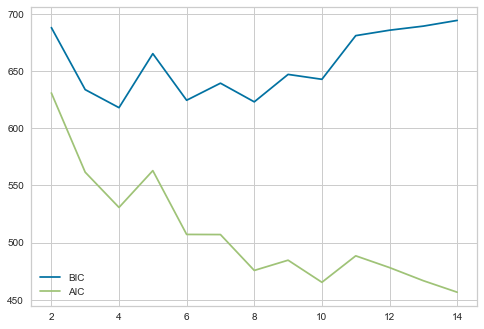

In [119]:
Gaussian(iris_data.data, 'tied')

[[1.00000000e+000 9.02279101e-012]
 [1.00000000e+000 2.47546102e-011]
 [1.00000000e+000 2.85813044e-012]
 [1.00000000e+000 2.84466405e-011]
 [1.00000000e+000 5.82366280e-012]
 [9.99999994e-001 5.89861909e-009]
 [1.00000000e+000 5.80627551e-012]
 [1.00000000e+000 1.82515777e-011]
 [1.00000000e+000 4.96868777e-011]
 [1.00000000e+000 2.77219392e-011]
 [1.00000000e+000 1.55277773e-010]
 [1.00000000e+000 3.24952574e-011]
 [1.00000000e+000 1.48947314e-011]
 [1.00000000e+000 2.61863511e-012]
 [9.99999999e-001 1.28950342e-009]
 [9.99999815e-001 1.85097288e-007]
 [1.00000000e+000 9.78649937e-011]
 [1.00000000e+000 1.36406698e-011]
 [9.99999958e-001 4.23627626e-008]
 [1.00000000e+000 4.45847571e-011]
 [9.99999998e-001 1.63646954e-009]
 [1.00000000e+000 6.28189906e-011]
 [1.00000000e+000 1.86026392e-013]
 [9.99999998e-001 1.56423509e-009]
 [9.99999998e-001 1.52642002e-009]
 [1.00000000e+000 2.59806106e-010]
 [1.00000000e+000 1.35729148e-010]
 [1.00000000e+000 3.96876864e-011]
 [1.00000000e+000 1.

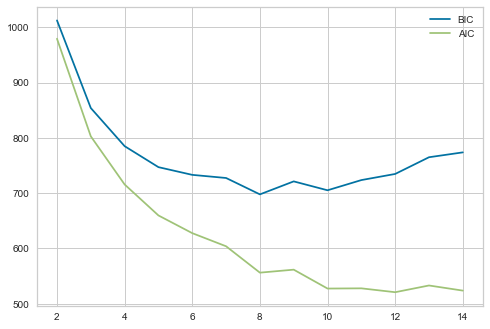

In [120]:
Gaussian(iris_data.data, 'spherical')

[[6.71255438e-010 9.99999999e-001]
 [4.00351444e-009 9.99999996e-001]
 [1.02363934e-009 9.99999999e-001]
 [2.76155873e-009 9.99999997e-001]
 [2.87863602e-010 1.00000000e+000]
 [3.55120056e-008 9.99999964e-001]
 [9.66146078e-010 9.99999999e-001]
 [1.30977612e-009 9.99999999e-001]
 [4.08186013e-009 9.99999996e-001]
 [4.28696678e-009 9.99999996e-001]
 [1.33396798e-009 9.99999999e-001]
 [1.84555639e-009 9.99999998e-001]
 [3.38144922e-009 9.99999997e-001]
 [5.20217117e-009 9.99999995e-001]
 [1.87104102e-009 9.99999998e-001]
 [1.24829744e-009 9.99999999e-001]
 [2.81944614e-009 9.99999997e-001]
 [1.54722482e-009 9.99999998e-001]
 [7.34037154e-008 9.99999927e-001]
 [4.73200545e-010 1.00000000e+000]
 [4.45887241e-008 9.99999955e-001]
 [4.58069859e-009 9.99999995e-001]
 [5.68773471e-010 9.99999999e-001]
 [3.23933367e-006 9.99996761e-001]
 [1.39644372e-007 9.99999860e-001]
 [1.83473736e-008 9.99999982e-001]
 [3.65176097e-008 9.99999963e-001]
 [1.56344272e-009 9.99999998e-001]
 [1.62739325e-009 9.

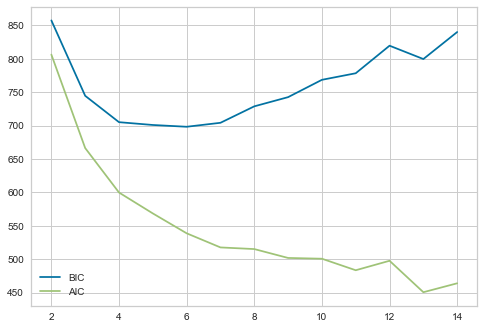

In [121]:
Gaussian(iris_data.data, 'diag')

In [87]:
#IRIS DATA WITH NORMALIZATION
normalized_iris=scaler.fit_transform(iris_data.data)

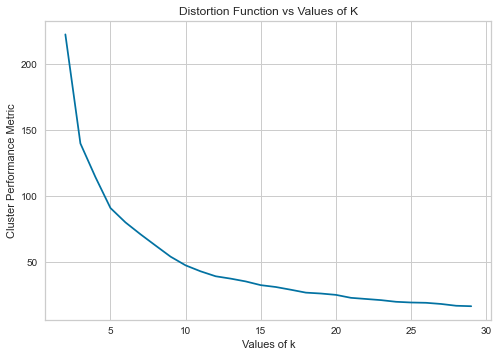

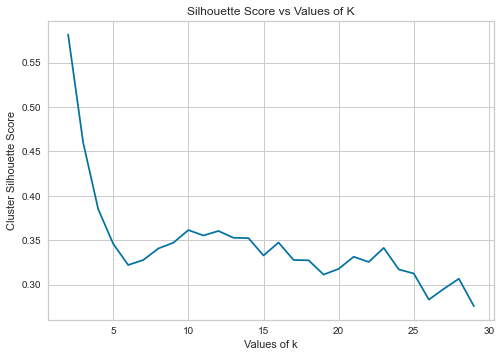

Optimim value of k is 2
0.5817500491982808 2


In [141]:
[best1, k1, best2, k2]=Kmeans_k(normalized_iris)
print(best2,k2)

RESULTS OF CASE:  euclidean  AND  average
Optimum distance threshold = 2.8000000000000003
Number of Clusters = 3


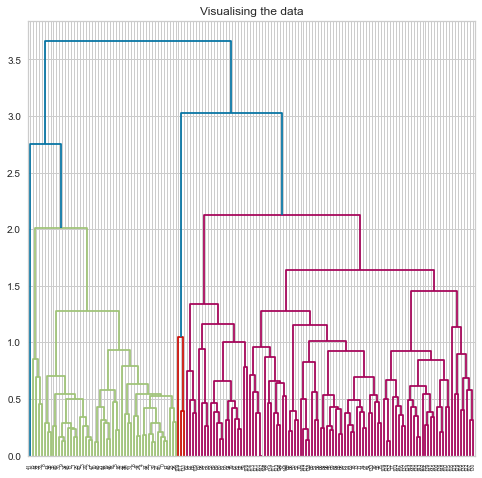

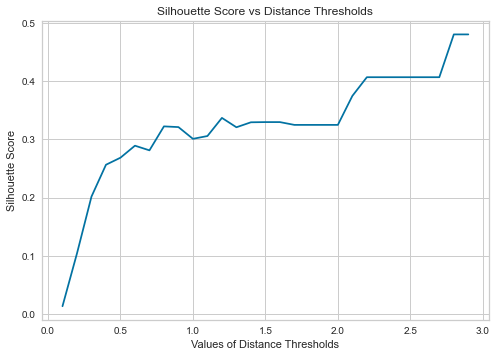

RESULTS OF CASE:  euclidean  AND  single
Optimum distance threshold = 1.4000000000000001
Number of Clusters = 2


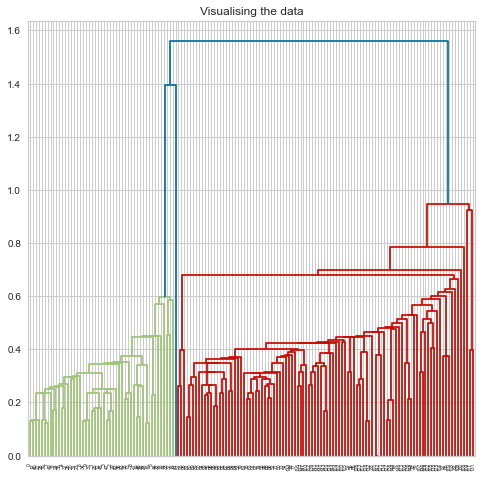

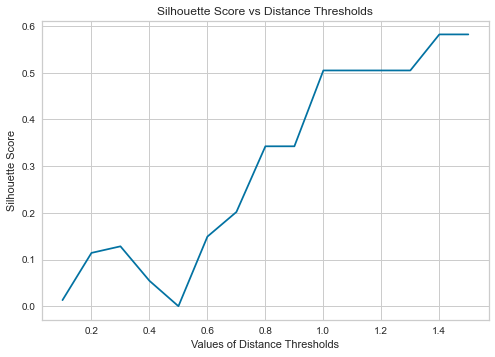

RESULTS OF CASE:  manhattan  AND  average
Optimum distance threshold = 2.9000000000000004
Number of Clusters = 5


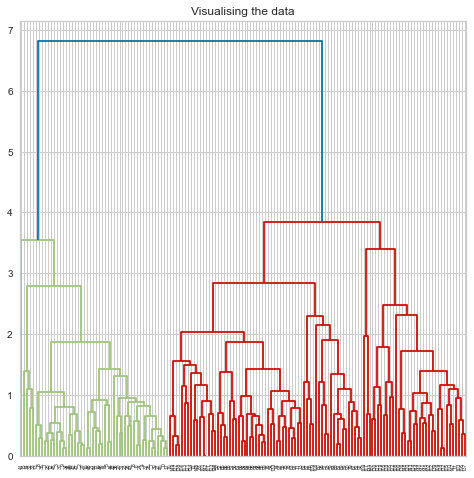

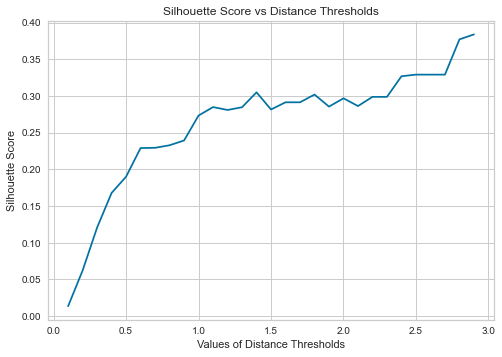

RESULTS OF CASE:  manhattan  AND  single
Optimum distance threshold = 1.9000000000000001
Number of Clusters = 2


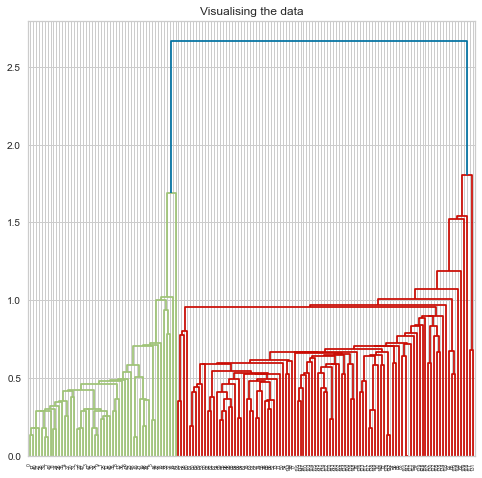

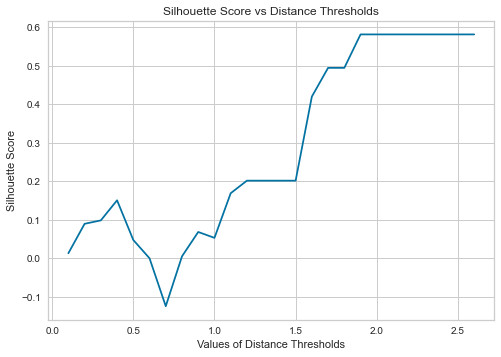

RESULTS OF CASE:  cosine  AND  average
Optimum distance threshold = 1.0
Number of Clusters = 2


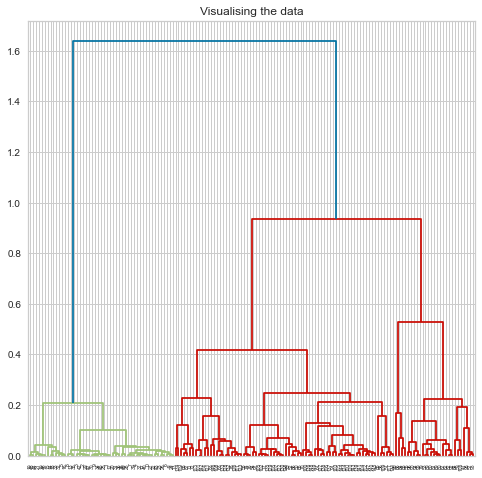

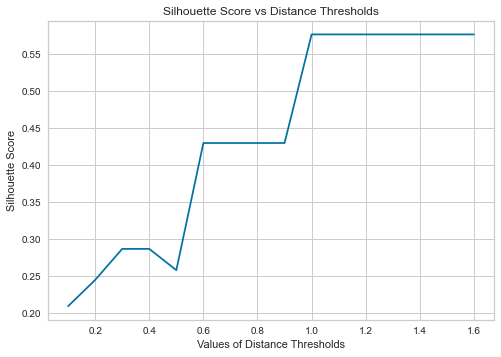

RESULTS OF CASE:  cosine  AND  single
Optimum distance threshold = 0.0073
Number of Clusters = 79


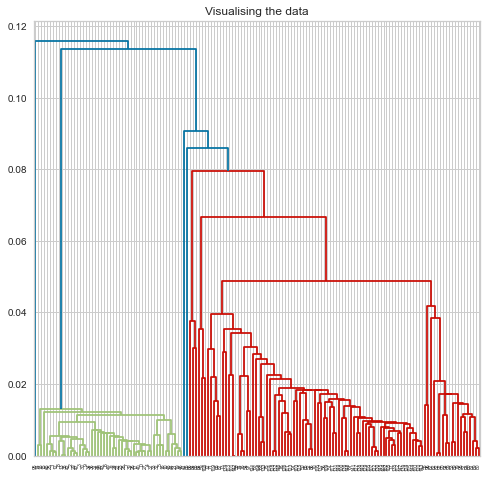

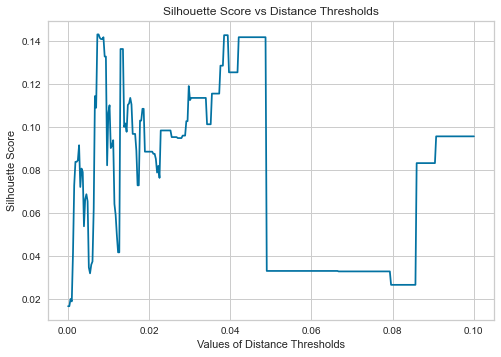

In [89]:
[s1,k1,d1]=Hierarchial_k(normalized_iris, "euclidean", "average")
[s2,k2,d2]=Hierarchial_k(normalized_iris, "euclidean", "single")
[s3,k3,d3]=Hierarchial_k(normalized_iris, "manhattan", "average")
[s4,k4,d4]=Hierarchial_k(normalized_iris, "manhattan", "single")
[s5,k5,d5]=Hierarchial_k(normalized_iris, "cosine", "average")
[s6,k6,d6]=Hierarchial_k(normalized_iris, "cosine", "single")


In [90]:
print(s1,s2,s3,s4,s5,s6)
print(k1,k2,k3,k4,k5,k6)

0.4802669329728697 0.5817500491982808 0.3838386825632119 0.5817500491982808 0.5770346019475988 0.0956440585647344
3 2 5 2 2 79


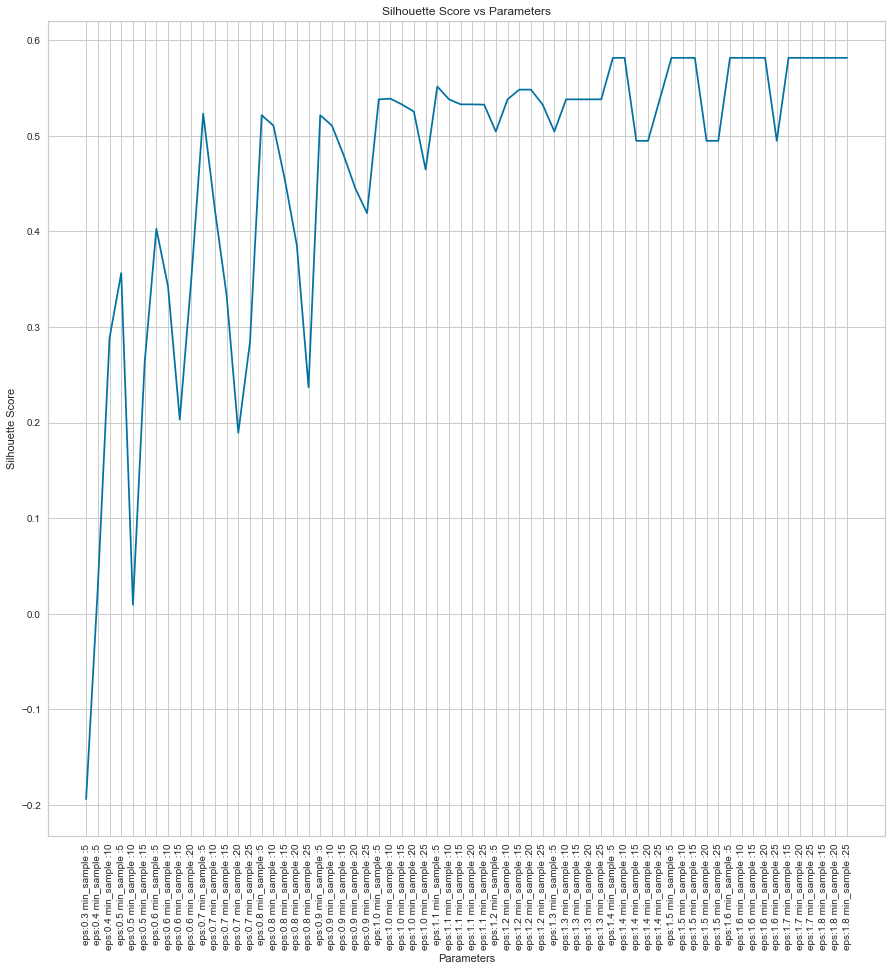

0.5817500491982808 1.4000000000000001 5 2


In [91]:
[data, s_score, eps, min_samples, k]=DBScan_k(normalized_iris)
print(s_score,eps,min_samples,k)

[[2.18046694e-011 1.00000000e+000]
 [7.81401717e-008 9.99999922e-001]
 [4.90268461e-009 9.99999995e-001]
 [1.32937927e-007 9.99999867e-001]
 [6.91125904e-012 1.00000000e+000]
 [8.33944446e-013 1.00000000e+000]
 [3.05494677e-009 9.99999997e-001]
 [3.98133686e-010 1.00000000e+000]
 [1.51297588e-006 9.99998487e-001]
 [9.02925492e-008 9.99999910e-001]
 [8.46471261e-013 1.00000000e+000]
 [3.14328230e-009 9.99999997e-001]
 [1.53346814e-007 9.99999847e-001]
 [3.85657601e-007 9.99999614e-001]
 [1.07195495e-016 1.00000000e+000]
 [7.73813184e-019 1.00000000e+000]
 [1.40108770e-014 1.00000000e+000]
 [2.96714216e-011 1.00000000e+000]
 [1.46871238e-012 1.00000000e+000]
 [6.43088500e-013 1.00000000e+000]
 [5.07229410e-009 9.99999995e-001]
 [1.03995546e-011 1.00000000e+000]
 [8.12984194e-011 1.00000000e+000]
 [3.78301198e-007 9.99999622e-001]
 [6.60355947e-007 9.99999340e-001]
 [7.67320949e-007 9.99999233e-001]
 [5.21539875e-009 9.99999995e-001]
 [4.52621609e-011 1.00000000e+000]
 [8.99988901e-011 1.

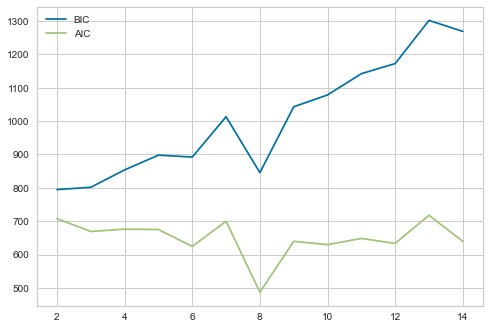

In [122]:
Gaussian(normalized_iris, 'full')


[[6.35396200e-11 1.00000000e+00]
 [4.59897201e-08 9.99999954e-01]
 [2.71829067e-09 9.99999997e-01]
 [1.10823727e-07 9.99999889e-01]
 [2.67566831e-11 1.00000000e+00]
 [9.87765243e-12 1.00000000e+00]
 [1.38702894e-09 9.99999999e-01]
 [8.63458170e-10 9.99999999e-01]
 [7.57888310e-07 9.99999242e-01]
 [3.17592633e-08 9.99999968e-01]
 [6.72743959e-12 1.00000000e+00]
 [4.94112287e-09 9.99999995e-01]
 [4.79497862e-08 9.99999952e-01]
 [8.92229120e-09 9.99999991e-01]
 [1.94105422e-15 1.00000000e+00]
 [1.09782994e-15 1.00000000e+00]
 [1.21925033e-13 1.00000000e+00]
 [8.41667917e-11 1.00000000e+00]
 [9.28380011e-12 1.00000000e+00]
 [7.15777045e-12 1.00000000e+00]
 [2.13615841e-09 9.99999998e-01]
 [3.10962724e-11 1.00000000e+00]
 [1.20159938e-12 1.00000000e+00]
 [4.28965663e-08 9.99999957e-01]
 [1.33427774e-07 9.99999867e-01]
 [2.99722272e-07 9.99999700e-01]
 [4.54541808e-09 9.99999995e-01]
 [1.38026590e-10 1.00000000e+00]
 [1.50888781e-10 1.00000000e+00]
 [7.34034558e-08 9.99999927e-01]
 [1.743126

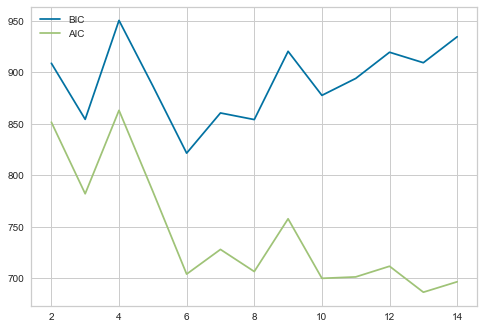

In [123]:
Gaussian(normalized_iris, 'tied')

[[1.12066192e-06 9.99998879e-01]
 [4.15416206e-05 9.99958458e-01]
 [1.99091305e-06 9.99998009e-01]
 [6.55808151e-06 9.99993442e-01]
 [4.28611413e-07 9.99999571e-01]
 [7.44504514e-06 9.99992555e-01]
 [6.26963261e-07 9.99999373e-01]
 [1.81058236e-06 9.99998189e-01]
 [3.26767273e-05 9.99967323e-01]
 [1.04076853e-05 9.99989592e-01]
 [2.34533515e-06 9.99997655e-01]
 [1.10499734e-06 9.99998895e-01]
 [1.73412440e-05 9.99982659e-01]
 [2.32715806e-06 9.99997673e-01]
 [6.94623768e-06 9.99993054e-01]
 [5.40850149e-05 9.99945915e-01]
 [2.73740100e-06 9.99997263e-01]
 [1.94915534e-06 9.99998051e-01]
 [2.86074856e-05 9.99971393e-01]
 [6.98049890e-07 9.99999302e-01]
 [1.97951533e-05 9.99980205e-01]
 [1.71782587e-06 9.99998282e-01]
 [4.36772283e-08 9.99999956e-01]
 [5.87030897e-05 9.99941297e-01]
 [2.46666359e-06 9.99997533e-01]
 [1.01147046e-04 9.99898853e-01]
 [7.32922826e-06 9.99992671e-01]
 [2.25687421e-06 9.99997743e-01]
 [3.39397934e-06 9.99996606e-01]
 [4.17233674e-06 9.99995828e-01]
 [1.570923

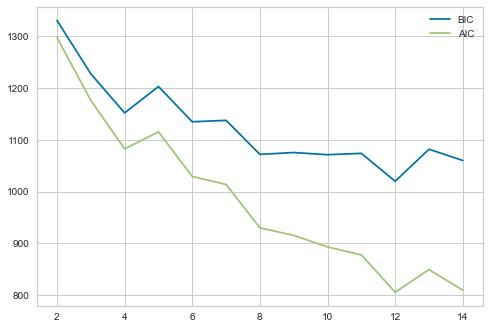

In [124]:
Gaussian(normalized_iris, 'spherical')

[[9.99999999e-001 6.71265036e-010]
 [9.99999996e-001 4.00363575e-009]
 [9.99999999e-001 1.02363904e-009]
 [9.99999997e-001 2.76164083e-009]
 [1.00000000e+000 2.87866458e-010]
 [9.99999964e-001 3.55110367e-008]
 [9.99999999e-001 9.66167254e-010]
 [9.99999999e-001 1.30980113e-009]
 [9.99999996e-001 4.08200403e-009]
 [9.99999996e-001 4.28722865e-009]
 [9.99999999e-001 1.33398032e-009]
 [9.99999998e-001 1.84554983e-009]
 [9.99999997e-001 3.38166104e-009]
 [9.99999995e-001 5.20174777e-009]
 [9.99999998e-001 1.87089976e-009]
 [9.99999999e-001 1.24831923e-009]
 [9.99999997e-001 2.81948968e-009]
 [9.99999998e-001 1.54725208e-009]
 [9.99999927e-001 7.33995010e-008]
 [1.00000000e+000 4.73203323e-010]
 [9.99999955e-001 4.45865948e-008]
 [9.99999995e-001 4.58092470e-009]
 [9.99999999e-001 5.68640490e-010]
 [9.99996760e-001 3.23956152e-006]
 [9.99999860e-001 1.39614332e-007]
 [9.99999982e-001 1.83475395e-008]
 [9.99999963e-001 3.65190209e-008]
 [9.99999998e-001 1.56346787e-009]
 [9.99999998e-001 1.

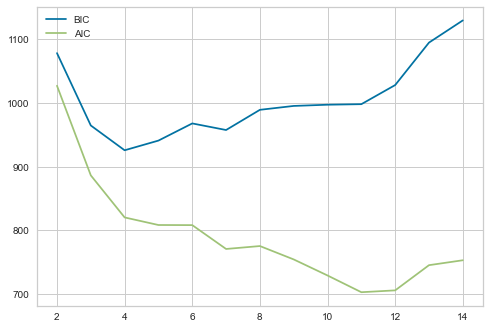

In [125]:
Gaussian(normalized_iris, 'diag')

## Customer dataset
Repeat all the above on the customer data set 

 
  * Results of the clustering algorithms on he customer dataset are harder rto interpret and vary hugely from each other. After normalization and calling each of the four algorithms' functions: I believe that the best clustering algorithm to such dataset is the Gaussian Mixture. This is because it gives the most predictable result of around 12-13 components. The variance is here is because each of the covariance types gave optimum clustering number of:
      * Full gives 11 components
      * Tied gives 13 components
      * Spherical gives 13 components
      * Diag gives 14 components
      
  * Kmeans' best sil_score is 0.41370892311486235 with optimum num_clusters= 28
  * Hiearchial Clusteruing's best sil_score is 0.3969701495528368 at 121 Clusters
  * DBScan's best sil_Score is 0.4225606832617899 eps= 1.2000000000000002 min_samples= 5 k=52
     

In [134]:
customer_data=pd.read_csv('Customer data.csv', index_col=0)
print(customer_data.shape)
customer_data

(2000, 7)


Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   
...        ...             ...  ...        ...     ...         ...   
100001996    1               0   47          1  123525           0   
100001997    1               1   27          1  117744           1   
100001998    0               0   31          0   86400           0   
100001999    1               1   24          1   97968           0   
100002000    0               0   25          0   68416           0   

           Settlement size  
ID                          
100000001                2  
100000002                2  
100000003                0  
100000004                1  
100000005                1  
...                    ...  
100001996                0  
100001997                0  
100001998                0  
100001999                0  
100002000                0  

[2000 rows x 7 columns]

In [135]:
customer_data=scaler.fit_transform(customer_data)


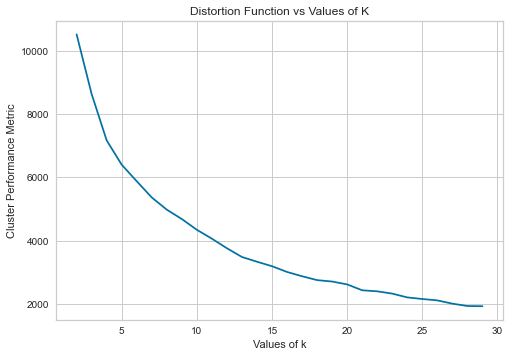

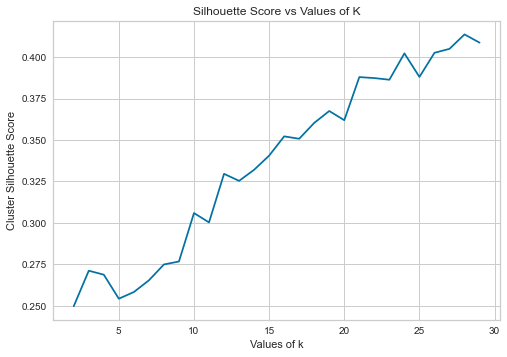

Optimim value of k is 28
0.41370892311486235 28


In [142]:
[best1, k1, best2, k2]=Kmeans_k(customer_data)
print(best2,k2)

RESULTS OF CASE:  euclidean  AND  average
Optimum distance threshold = 1.4000000000000001
Number of Clusters = 121


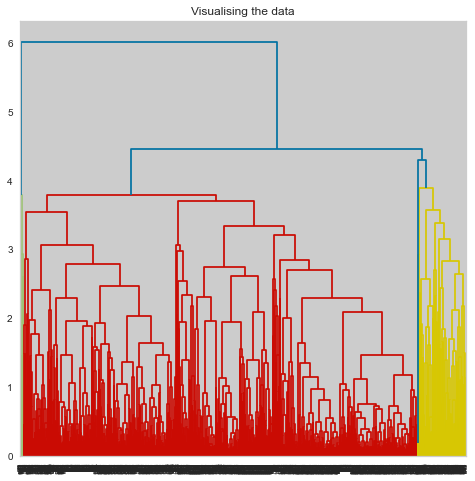

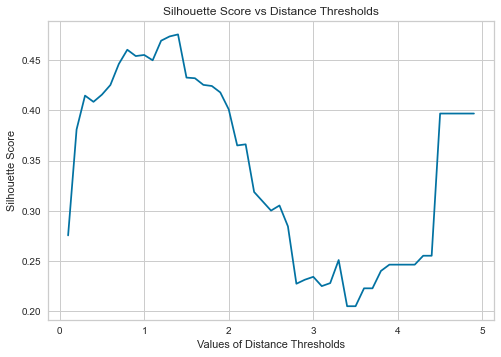

RESULTS OF CASE:  euclidean  AND  single
Optimum distance threshold = 0.9
Number of Clusters = 122


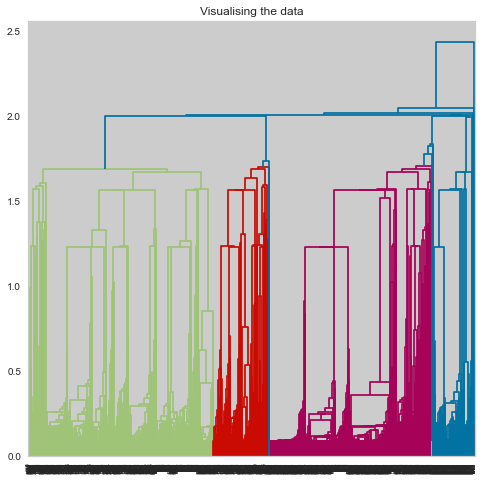

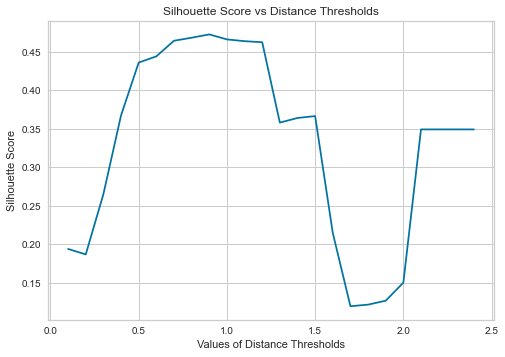

RESULTS OF CASE:  manhattan  AND  average
Optimum distance threshold = 1.6
Number of Clusters = 140


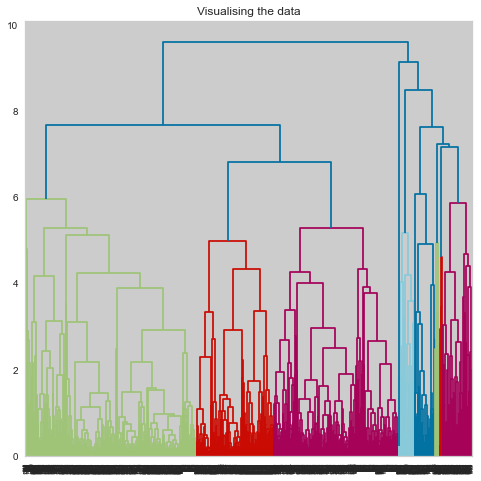

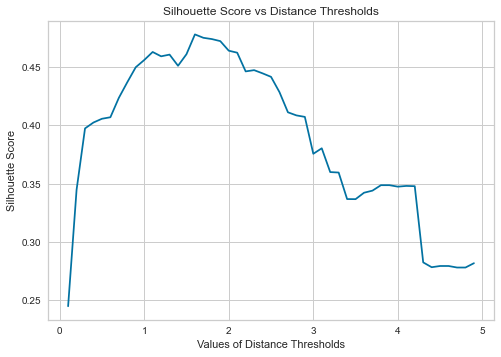

RESULTS OF CASE:  manhattan  AND  single
Optimum distance threshold = 1.0
Number of Clusters = 124


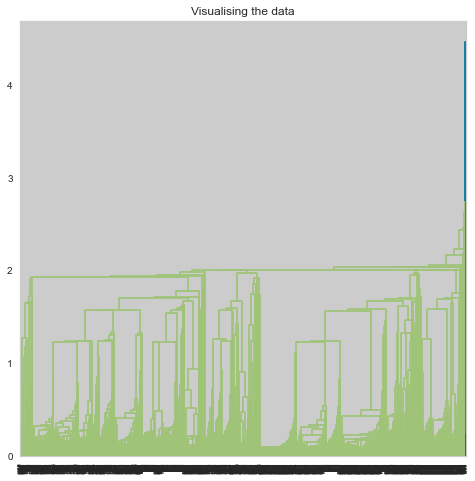

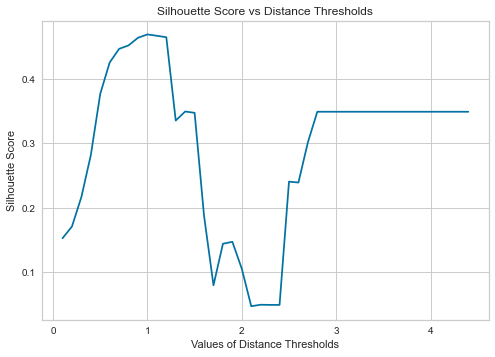

RESULTS OF CASE:  cosine  AND  average
Optimum distance threshold = 0.1
Number of Clusters = 126


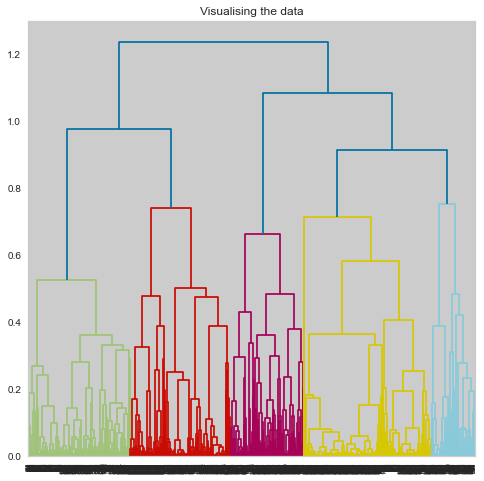

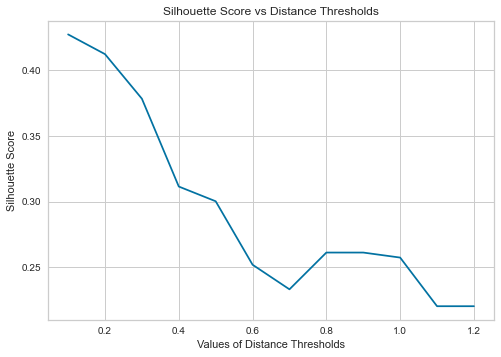

RESULTS OF CASE:  cosine  AND  single
Optimum distance threshold = 0.0322
Number of Clusters = 124


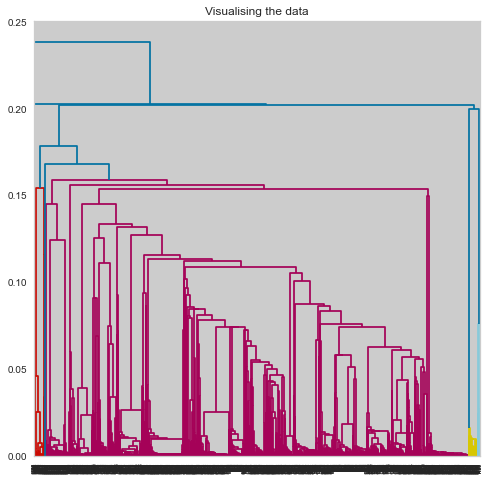

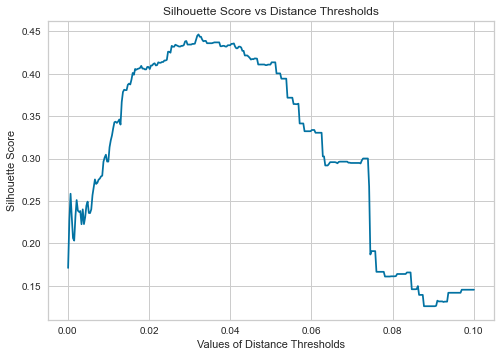

In [147]:
[s1,k1,d1]=Hierarchial_k(customer_data, "euclidean", "average")
[s2,k2,d2]=Hierarchial_k(customer_data, "euclidean", "single")
[s3,k3,d3]=Hierarchial_k(customer_data, "manhattan", "average")
[s4,k4,d4]=Hierarchial_k(customer_data, "manhattan", "single")
[s5,k5,d5]=Hierarchial_k(customer_data, "cosine", "average")
[s6,k6,d6]=Hierarchial_k(customer_data, "cosine", "single")

In [148]:
print(s1,s2,s3,s4,s5,s6)
print(k1,k2,k3,k4,k5,k6)

0.3969701495528368 0.34916658225914216 0.2818543188658067 0.34916658225914216 0.22023602771959108 0.14534041955822222
121 122 140 124 126 124


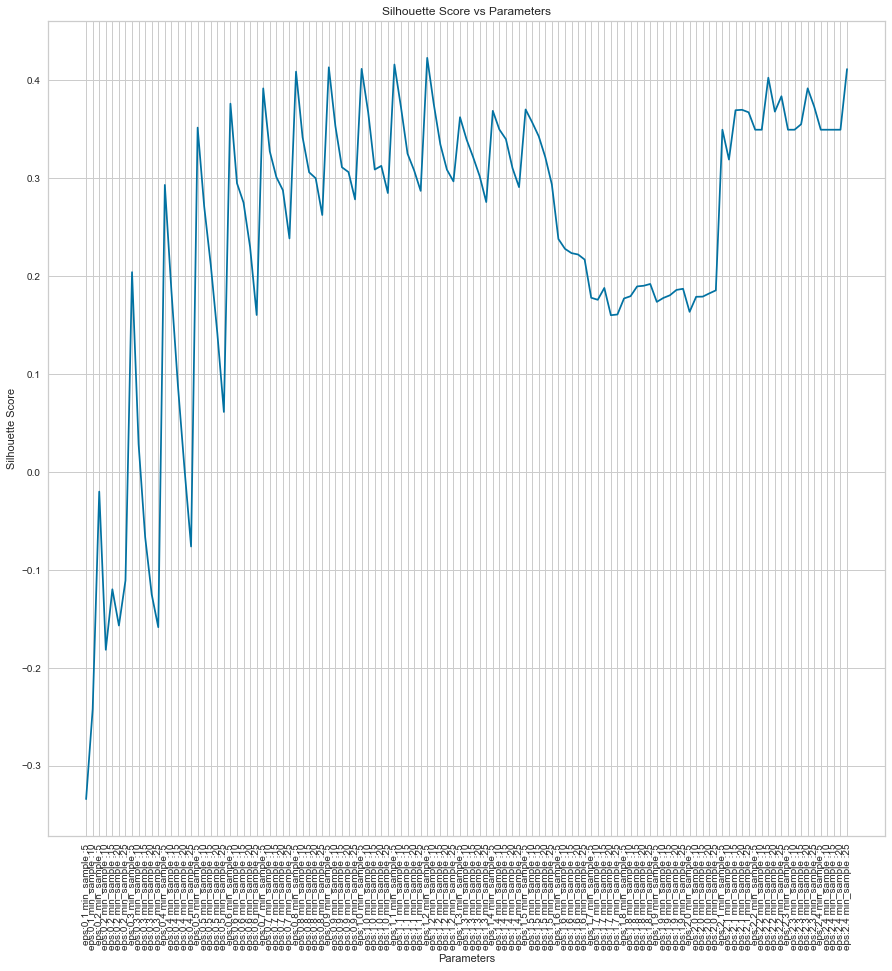

0.4225606832617899 1.2000000000000002 5 52


In [144]:
[data, s_score, eps, min_samples, k]=DBScan_k(customer_data)
print(s_score,eps,min_samples,k)

[[1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [3.45269807e-06 9.99996547e-01]
 ...
 [5.29874077e-06 9.99994701e-01]
 [3.36506517e-06 9.99996635e-01]
 [3.34849212e-06 9.99996652e-01]]
[[3.72278004e-060 0.00000000e+000 1.00000000e+000]
 [8.96332764e-058 1.00000000e+000 0.00000000e+000]
 [4.47913101e-056 0.00000000e+000 1.00000000e+000]
 ...
 [4.56810901e-099 0.00000000e+000 1.00000000e+000]
 [3.20975025e-053 1.00000000e+000 0.00000000e+000]
 [8.31867875e-109 0.00000000e+000 1.00000000e+000]]
[[0.00000000e+00 1.00000000e+00 6.04815680e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.17804701e-10 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 7.59512036e-11 0.00000000e+00]
 ...
 [0.00000000e+00 1.00000000e+00 6.02466585e-12 0.00000000e+00]
 [1.14501841e-02 0.00000000e+00 3.61072143e-13 9.88549816e-01]
 [0.00000000e+00 1.00000000e+00 3.76523905e-12 0.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.0

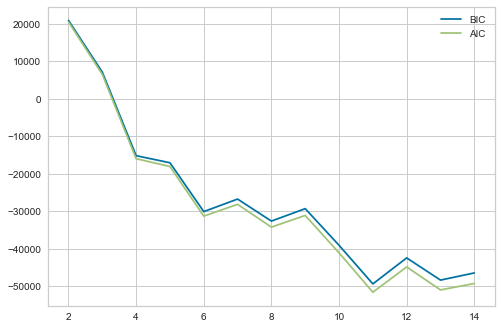

In [149]:
Gaussian(customer_data, 'full')

[[9.21210697e-06 9.99990788e-01]
 [5.15355940e-04 9.99484644e-01]
 [9.98604493e-01 1.39550746e-03]
 ...
 [9.99337734e-01 6.62266197e-04]
 [9.99962163e-01 3.78368928e-05]
 [9.99628668e-01 3.71332471e-04]]
[[9.75297898e-01 2.47017891e-02 3.13104619e-07]
 [3.92757857e-02 9.60722386e-01 1.82784983e-06]
 [6.45211344e-05 1.19549457e-05 9.99923524e-01]
 ...
 [7.29711455e-05 9.26752115e-06 9.99917761e-01]
 [3.36549204e-07 9.85294227e-05 9.99901134e-01]
 [3.36948288e-05 6.89455332e-06 9.99959411e-01]]
[[0.00000000e+00 2.28293087e-03 9.97717069e-01 0.00000000e+00]
 [4.57175232e-02 0.00000000e+00 0.00000000e+00 9.54282477e-01]
 [0.00000000e+00 9.26063009e-01 7.39369910e-02 0.00000000e+00]
 ...
 [0.00000000e+00 9.82244353e-01 1.77556472e-02 0.00000000e+00]
 [2.05512838e-04 0.00000000e+00 0.00000000e+00 9.99794487e-01]
 [0.00000000e+00 9.93134800e-01 6.86520031e-03 0.00000000e+00]]
[[9.99910807e-01 0.00000000e+00 0.00000000e+00 8.91925079e-05
  1.02471431e-16]
 [0.00000000e+00 6.56044282e-15 1.0000

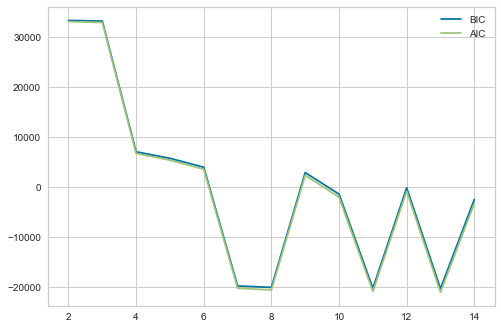

In [150]:
Gaussian(customer_data, 'tied')

[[4.88646438e-06 9.99995114e-01]
 [1.48280974e-01 8.51719026e-01]
 [6.77917320e-01 3.22082680e-01]
 ...
 [9.21103171e-01 7.88968286e-02]
 [9.99150979e-01 8.49021370e-04]
 [9.58783228e-01 4.12167717e-02]]
[[1.27189886e-26 1.81727539e-05 9.99981827e-01]
 [1.55827875e-04 1.16282625e-03 9.98681346e-01]
 [1.22408865e-11 9.75143435e-01 2.48565653e-02]
 ...
 [1.57656548e-11 9.98956006e-01 1.04399447e-03]
 [9.98850382e-01 8.97910341e-04 2.51707163e-04]
 [9.27895191e-12 9.99280399e-01 7.19601032e-04]]
[[1.09551382e-50 9.24529400e-04 1.10794464e-35 9.99075471e-01]
 [8.43844144e-01 1.42176480e-02 3.83705249e-09 1.41938204e-01]
 [3.84276637e-37 9.83194303e-01 1.69658865e-13 1.68056972e-02]
 ...
 [5.00938778e-36 9.99605697e-01 3.68953208e-13 3.94303006e-04]
 [9.14976850e-12 2.37575133e-04 9.99738891e-01 2.35342138e-05]
 [1.45686328e-37 9.99760168e-01 2.17053620e-13 2.39831867e-04]]
[[9.96397540e-01 4.51330256e-20 1.26348019e-04 3.47547598e-03
  6.35555904e-07]
 [3.53273701e-01 1.27885063e-01 1.0637

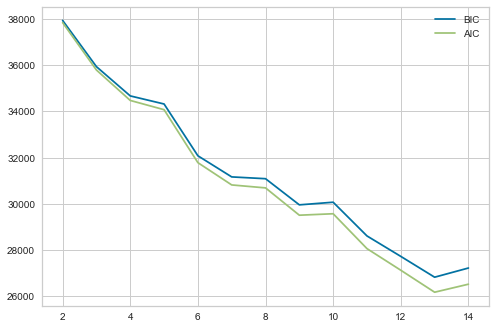

In [151]:
Gaussian(customer_data, 'spherical')

[[0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [9.99998424e-01 1.57597866e-06]
 ...
 [9.99998989e-01 1.01108072e-06]
 [9.99999797e-01 2.03343084e-07]
 [9.99999186e-01 8.14166559e-07]]
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 4.27859385e-10]
 [0.00000000e+00 9.99999997e-01 0.00000000e+00 2.59567935e-09]
 [4.53806933e-03 0.00000000e+00 9.95461931e-01 4.29771619e-13]
 ...
 [1.83453507e-03 0.00000000e+00 9.98165465e-01 1.38571050e-17]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 2.80678748e-10]
 [1.47324226e-03 0.00000000e+00 9.98526758e-01 6.97179645e-18]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [1.25704590e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.99999874e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [1.44051

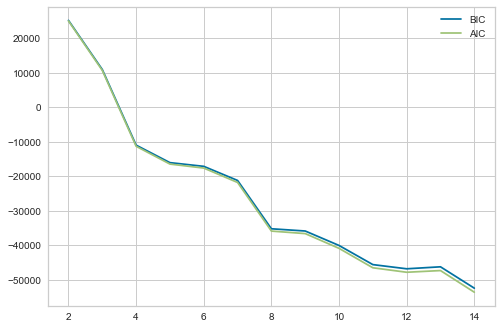

In [152]:
Gaussian(customer_data, 'diag')